In [1]:
# Importer des libairies utilisables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import unidip.dip as dip
import pingouin as pg

In [2]:
# montrer 100 colonnes, 100 lignes

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# 1. Combiner les deux jeux de donnée en 2015 et 2016

In [3]:
# Importer des données en 2015 et les transformer en DataFrame pandas à partir de fichier csv

df15 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [4]:
df15.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [5]:
df15.shape

(3340, 47)

In [6]:
# Visualiser l'information (type, nombre de colonne et de ligne, ...)

df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [7]:
# Importer des données en 2016 et les transformer en DataFrame pandas à partir de fichier csv

df16 = pd.read_csv('2016-building-energy-benchmarking.csv')
df16.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
df16.shape

(3376, 46)

In [9]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
# la fonction pour vérifier les différentes colonnes de deux DataFrames

def columns_diff (df1, df2):
    if set(df1) == set(df2):
        print(f'deux datasets ont {df1.shape[1]} mêmes colonnes ')
    else:
        df1_2 = list(set(df1) - set(df2))
        df2_1 = list(set(df2) - set(df1))
        print(f'{len(df1_2)} colonnes présentées dans 1er dataset sont absentes dans 2ème dataset:\n \n{df1_2}')
        print('\n \n')
        print(f'{len(df2_1)} colonnes présentées dans 2ème dataset sont absentes dans 1er dataset:\n \n{df2_1}')

columns_diff(df15, df16)

10 colonnes présentées dans 1er dataset sont absentes dans 2ème dataset:
 
['GHGEmissions(MetricTonsCO2e)', 'OtherFuelUse(kBtu)', 'Zip Codes', 'Location', 'City Council Districts', 'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats', '2010 Census Tracts', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment']

 

9 colonnes présentées dans 2ème dataset sont absentes dans 1er dataset:
 
['City', 'Longitude', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Address', 'Latitude', 'Comments', 'State', 'ZipCode']


In [11]:
# extraire les variables imbriquées dans la colonne Location

df15 = pd.concat([df15.drop('Location', axis =1), df15['Location'].map(literal_eval).apply(pd.Series)],
                axis = 1)
df15 = pd.concat([df15.drop('human_address', axis = 1),
                  df15['human_address'].map(literal_eval).apply(pd.Series)], axis = 1)

In [12]:
# vérifier les différentes colonnes dans 2 DataFrames

columns_diff(df15, df16)

15 colonnes présentées dans 1er dataset sont absentes dans 2ème dataset:
 
['GHGEmissions(MetricTonsCO2e)', 'state', 'zip', 'OtherFuelUse(kBtu)', 'address', 'Zip Codes', 'City Council Districts', 'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats', '2010 Census Tracts', 'city', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', 'latitude', 'longitude']

 

9 colonnes présentées dans 2ème dataset sont absentes dans 1er dataset:
 
['City', 'Longitude', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Address', 'Latitude', 'Comments', 'State', 'ZipCode']


In [13]:
# supprimer les colonnes inutiles

df15 = df15.drop(['Seattle Police Department Micro Community Policing Plan Areas', 'OtherFuelUse(kBtu)',
                 'SPD Beats', 'Zip Codes', '2010 Census Tracts', 'City Council Districts',
                 ], axis = 1)

In [14]:
# renommer les colonnes de DataFrame df15 pour être cohérentes avec les colonnes de df16

df15.rename({'Zip Codes': 'ZipCode', 'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
            'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions', 'Comment':'Comments',
             'latitude' : 'Latitude', 'address': 'Address', 'zip': 'ZipCode', 'longitude' : 'Longitude',
            'city': 'City', 'state': 'State'},
            axis = 1, inplace = True)

In [15]:
columns_diff(df15, df16)

deux datasets ont 46 mêmes colonnes 


In [16]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3340 non-null   int64  
 1   DataYear                         3340 non-null   int64  
 2   BuildingType                     3340 non-null   object 
 3   PrimaryPropertyType              3340 non-null   object 
 4   PropertyName                     3340 non-null   object 
 5   TaxParcelIdentificationNumber    3338 non-null   object 
 6   CouncilDistrictCode              3340 non-null   int64  
 7   Neighborhood                     3340 non-null   object 
 8   YearBuilt                        3340 non-null   int64  
 9   NumberofBuildings                3340 non-null   int64  
 10  NumberofFloors                   3332 non-null   float64
 11  PropertyGFATotal                 3340 non-null   int64  
 12  PropertyGFAParking  

In [17]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [18]:
# changer le type des colonnes

df15[['Latitude','Longitude', 'ZipCode']] = df15[['Latitude','Longitude', 'ZipCode']].astype('float64')
df15['DefaultData'] = df15['DefaultData'].astype('bool')

In [19]:
# combiner 2 DataFrames

data = pd.concat([df15, df16], axis = 0)
data.shape

(6716, 46)

# 2. Nettoyer et traiter les données

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

## 2.1 formatage des chaînes de caractères

In [21]:
# formatage des chaînes de caractères pour faciliter la lecture

for col in data.select_dtypes('object'):
    data[col] = data[col].str.lower()
    data[col] = data[col].str.capitalize() 

## 2.2 Harmonisation des chaînes de caractères

In [22]:
data['PrimaryPropertyType'].value_counts()

Low-rise multifamily           1985
Mid-rise multifamily           1103
Small- and mid-sized office     590
Other                           514
Large office                    344
K-12 school                     275
Mixed use property              259
High-rise multifamily           208
Retail store                    191
Non-refrigerated warehouse      187
Warehouse                       187
Hotel                           150
Worship facility                143
Senior care community            88
Medical office                   82
Distribution center              55
Distribution center\n            51
Supermarket / grocery store      40
Supermarket/grocery store        36
Self-storage facility            29
Self-storage facility\n          27
Refrigerated warehouse           25
University                       25
Residence hall                   23
College/university               22
Hospital                         20
Residence hall/dormitory         15
Restaurant                  

In [23]:
# Harmonisation des chaînes de caractères

PrimaryPropertyType = {'Distribution center\n': 'Distribution center',
                       'Supermarket / grocery store': 'Supermarket/grocery store', 
                      'Self-storage facility\n': 'Self-storage facility',
                      'University': 'College/university', 'Residence hall': 'Residence hall/dormitory',
                      'Restaurant\n': 'Restaurant', 'Sps-district k-12': 'K-12 school', 
                      'Refrigerated warehouse': 'Warehouse',
                      'Non-refrigerated warehouse': 'Warehouse'}

data['PrimaryPropertyType'].replace(PrimaryPropertyType, inplace = True)
data['PrimaryPropertyType'].value_counts()

Low-rise multifamily           1985
Mid-rise multifamily           1103
Small- and mid-sized office     590
Other                           514
Warehouse                       399
Large office                    344
K-12 school                     279
Mixed use property              259
High-rise multifamily           208
Retail store                    191
Hotel                           150
Worship facility                143
Distribution center             106
Senior care community            88
Medical office                   82
Supermarket/grocery store        76
Self-storage facility            56
College/university               47
Residence hall/dormitory         38
Restaurant                       24
Hospital                         20
Laboratory                       11
Office                            3
Name: PrimaryPropertyType, dtype: int64

In [24]:
data['Neighborhood'].value_counts()

Downtown                  1151
East                       897
Magnolia / queen anne      843
Greater duwamish           744
Northeast                  539
Lake union                 500
Northwest                  447
North                      375
Southwest                  331
Central                    265
Ballard                    263
Southeast                  191
Delridge                   169
Delridge neighborhoods       1
Name: Neighborhood, dtype: int64

In [25]:
# Harmonisation des chaînes de caractères

Neighborhood = {'Delridge neighborhoods': 'Delridge'}

data['Neighborhood'].replace(Neighborhood, inplace = True)

In [26]:
# Harmonisation des chaînes de caractères

LargestPropertyUseType = {'Supermarket/grocery store' : 'Retail store',
                         'Strip mall': 'Retail store', 
                         'Other/specialty hospital': 'Hopital',
                         'Hospital (general medical & surgical)': 'Hopital',
                         'Other - mall': 'Retail store',
                         'Other - education': 'Education',
                         'Financial office': 'Office',
                         'Adult education': 'Eduction',
                         'Other - restaurant/bar': 'Restaurant',
                         'Pre-school/daycare': 'Education',
                         'Wholesale club/supercenter': 'Distribution center',
                         'Outpatient rehabilitation/physical therapy': 'Fitness center/health club/gym'
}

data['LargestPropertyUseType'].replace(LargestPropertyUseType, inplace = True)

data['LargestPropertyUseType'].value_counts()

Multifamily housing                                     3265
Office                                                   984
Non-refrigerated warehouse                               393
Retail store                                             295
K-12 school                                              275
Other                                                    206
Hotel                                                    145
Worship facility                                         141
Distribution center                                      108
Senior care community                                     88
Medical office                                            84
Parking                                                   60
Self-storage facility                                     55
Other - recreation                                        51
College/university                                        46
Other - entertainment/public assembly                     41
Residence hall/dormitory

In [27]:
data['SecondLargestPropertyUseType'].value_counts()

Parking                                                 1857
Office                                                   419
Retail store                                             310
Other                                                    116
Restaurant                                                83
Non-refrigerated warehouse                                68
Multifamily housing                                       34
Supermarket/grocery store                                 28
Fitness center/health club/gym                            27
Data center                                               26
Other - services                                          24
Medical office                                            23
Swimming pool                                             18
Other - entertainment/public assembly                     16
Distribution center                                       14
Laboratory                                                14
Bank branch             

In [28]:
# Harmonisation des chaînes de caractères

SecondLargestPropertyUseType = {'Other - restaurant/bar' : 'Restaurant', 
                               'Food sales': 'Food service',
                               'Adult education': 'Education',
                               'Other - education': 'Education',
                               'Hospital (general medical & surgical)': 'Hopital',
                               'Financial office': 'Office',
                               'Other/specialty hospital': 'Hopital',
                               'Vocational school': 'Education',
                               'Convenience store without gas station': 'Retail store',
                               'Pre-school/daycare':'Education',
                               'Supermarket/grocery store': 'Retail store',
                               'Enclosed mall': 'Retail store'
                               } 
data['SecondLargestPropertyUseType'].replace(SecondLargestPropertyUseType, inplace = True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

## 2.3 Supprimer les valeurs aberrantes

In [30]:
for col in data.select_dtypes(['float', 'int64']):
    print(f'{col :-<50} {data[data[col]<0].shape[0]}')

OSEBuildingID------------------------------------- 0
DataYear------------------------------------------ 0
CouncilDistrictCode------------------------------- 0
YearBuilt----------------------------------------- 0
NumberofBuildings--------------------------------- 0
NumberofFloors------------------------------------ 0
PropertyGFATotal---------------------------------- 0
PropertyGFAParking-------------------------------- 2
PropertyGFABuilding(s)---------------------------- 2
LargestPropertyUseTypeGFA------------------------- 0
SecondLargestPropertyUseTypeGFA------------------- 0
ThirdLargestPropertyUseTypeGFA-------------------- 0
ENERGYSTARScore----------------------------------- 0
SiteEUI(kBtu/sf)---------------------------------- 0
SiteEUIWN(kBtu/sf)-------------------------------- 0
SourceEUI(kBtu/sf)-------------------------------- 1
SourceEUIWN(kBtu/sf)------------------------------ 2
SiteEnergyUse(kBtu)------------------------------- 0
SiteEnergyUseWN(kBtu)-------------------------

In [31]:
data = data[data['PropertyGFAParking'] >= 0]
data = data[data['PropertyGFABuilding(s)'] >= 0]
data = data[data['SourceEUI(kBtu/sf)'] >= 0]
data = data[data['SourceEUIWN(kBtu/sf)'] >= 0]
data = data[data['Electricity(kWh)'] >= 0]
data = data[data['Electricity(kBtu)'] >= 0]
data = data[data["TotalGHGEmissions"] >= 0]
data = data[data["GHGEmissionsIntensity"] >= 0]

In [32]:
data.reset_index(inplace = True, drop = True)

In [33]:
data.index

RangeIndex(start=0, stop=6691, step=1)

In [34]:
for col in data.select_dtypes(['float', 'int64']):
    print(f'{col :-<50} {data[data[col]<0].shape[0]}')

OSEBuildingID------------------------------------- 0
DataYear------------------------------------------ 0
CouncilDistrictCode------------------------------- 0
YearBuilt----------------------------------------- 0
NumberofBuildings--------------------------------- 0
NumberofFloors------------------------------------ 0
PropertyGFATotal---------------------------------- 0
PropertyGFAParking-------------------------------- 0
PropertyGFABuilding(s)---------------------------- 0
LargestPropertyUseTypeGFA------------------------- 0
SecondLargestPropertyUseTypeGFA------------------- 0
ThirdLargestPropertyUseTypeGFA-------------------- 0
ENERGYSTARScore----------------------------------- 0
SiteEUI(kBtu/sf)---------------------------------- 0
SiteEUIWN(kBtu/sf)-------------------------------- 0
SourceEUI(kBtu/sf)-------------------------------- 0
SourceEUIWN(kBtu/sf)------------------------------ 0
SiteEnergyUse(kBtu)------------------------------- 0
SiteEnergyUseWN(kBtu)-------------------------

## 2.5 Créer la nouvelle variable

In [35]:
data['BuildingAge'] = data['DataYear'] -data['YearBuilt']

data['%GFABuilding'] = data['PropertyGFABuilding(s)']/ data['PropertyGFATotal']

data['%GFAParking'] = data['PropertyGFAParking']/ data['PropertyGFATotal']

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6691 non-null   int64  
 1   DataYear                         6691 non-null   int64  
 2   BuildingType                     6691 non-null   object 
 3   PrimaryPropertyType              6691 non-null   object 
 4   PropertyName                     6691 non-null   object 
 5   TaxParcelIdentificationNumber    6689 non-null   object 
 6   CouncilDistrictCode              6691 non-null   int64  
 7   Neighborhood                     6691 non-null   object 
 8   YearBuilt                        6691 non-null   int64  
 9   NumberofBuildings                6691 non-null   float64
 10  NumberofFloors                   6683 non-null   float64
 11  PropertyGFATotal                 6691 non-null   int64  
 12  PropertyGFAParking  

## 2.6 Supprimer des bâtiments dubliques (selon OSEBuildingID)

In [37]:
data = data.drop_duplicates(subset=['OSEBuildingID'], keep='last')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 47 to 6690
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3427 non-null   int64  
 1   DataYear                         3427 non-null   int64  
 2   BuildingType                     3427 non-null   object 
 3   PrimaryPropertyType              3427 non-null   object 
 4   PropertyName                     3427 non-null   object 
 5   TaxParcelIdentificationNumber    3426 non-null   object 
 6   CouncilDistrictCode              3427 non-null   int64  
 7   Neighborhood                     3427 non-null   object 
 8   YearBuilt                        3427 non-null   int64  
 9   NumberofBuildings                3427 non-null   float64
 10  NumberofFloors                   3427 non-null   float64
 11  PropertyGFATotal                 3427 non-null   int64  
 12  PropertyGFAParking 

## 2.7 Supprimer des colonnes inutiles et des lignes contenant les valeurs manquantes restées

In [39]:
data = data.drop(['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber', 
                  'CouncilDistrictCode',
                 'YearBuilt', 'ListOfAllPropertyUseTypes', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                 'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'DefaultData',
                 'ComplianceStatus', 'Latitude', 'Longitude', 'Address', 'City', 'State', 'ZipCode', 
                  'GHGEmissionsIntensity'], axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 47 to 6690
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3427 non-null   object 
 1   PrimaryPropertyType              3427 non-null   object 
 2   Neighborhood                     3427 non-null   object 
 3   NumberofBuildings                3427 non-null   float64
 4   NumberofFloors                   3427 non-null   float64
 5   PropertyGFATotal                 3427 non-null   int64  
 6   PropertyGFAParking               3427 non-null   int64  
 7   PropertyGFABuilding(s)           3427 non-null   int64  
 8   LargestPropertyUseType           3395 non-null   object 
 9   LargestPropertyUseTypeGFA        3395 non-null   float64
 10  SecondLargestPropertyUseType     1698 non-null   object 
 11  SecondLargestPropertyUseTypeGFA  1698 non-null   float64
 12  ThirdLargestPropert

## 2.4 Traiter les valeurs manquantes

In [40]:
# Affichage du pourcentage de donneés manquantes

data.isna().sum()/data.shape[0]

BuildingType                       0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
LargestPropertyUseType             0.009338
LargestPropertyUseTypeGFA          0.009338
SecondLargestPropertyUseType       0.504523
SecondLargestPropertyUseTypeGFA    0.504523
ThirdLargestPropertyUseType        0.824336
ThirdLargestPropertyUseTypeGFA     0.824336
YearsENERGYSTARCertified           0.964984
ENERGYSTARScore                    0.247739
SiteEUI(kBtu/sf)                   0.000584
SourceEUI(kBtu/sf)                 0.000000
SiteEnergyUse(kBtu)                0.000000
SteamUse(kBtu)                     0.000000
Electricity(kBtu)                  0.000000
NaturalGas(kBtu)                   0.000000
TotalGHGEmissions               

<AxesSubplot:>

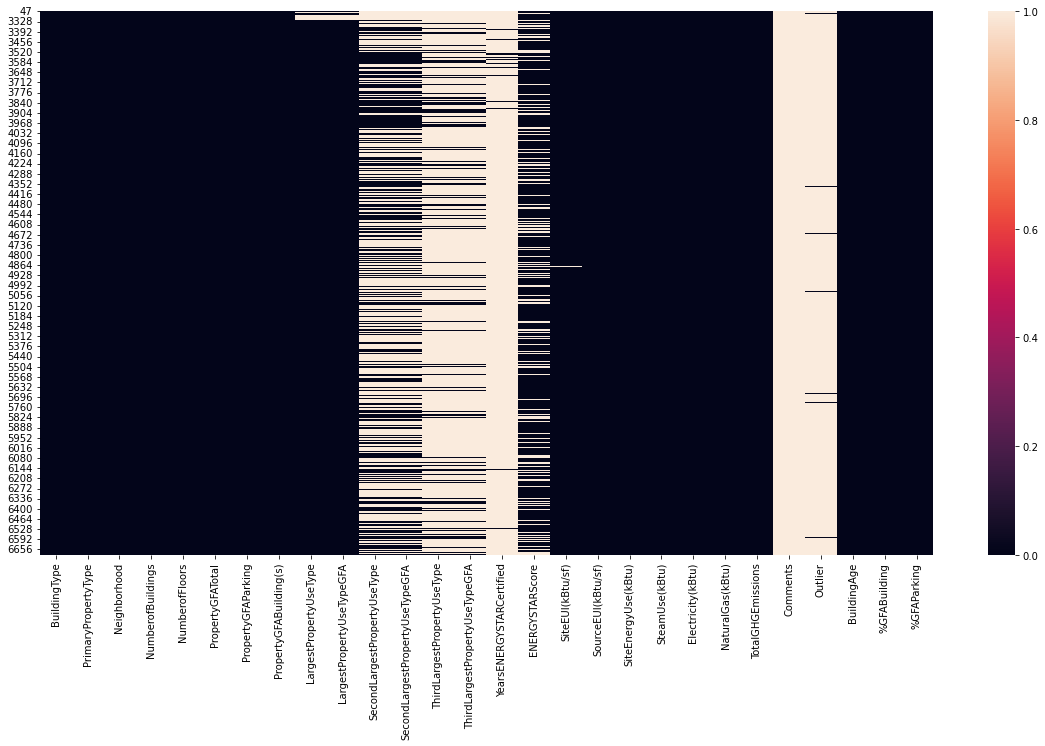

In [41]:
# Affichage les valeurs manquantes en figure

plt.figure(figsize=(20, 10))
sns.heatmap(data.isna())

In [42]:
# Suppression des colonnes avec plus de 80% de valeurs manquantes

data = data[data.columns[data.isna().sum()/data.shape[0] < 0.5]]

<AxesSubplot:>

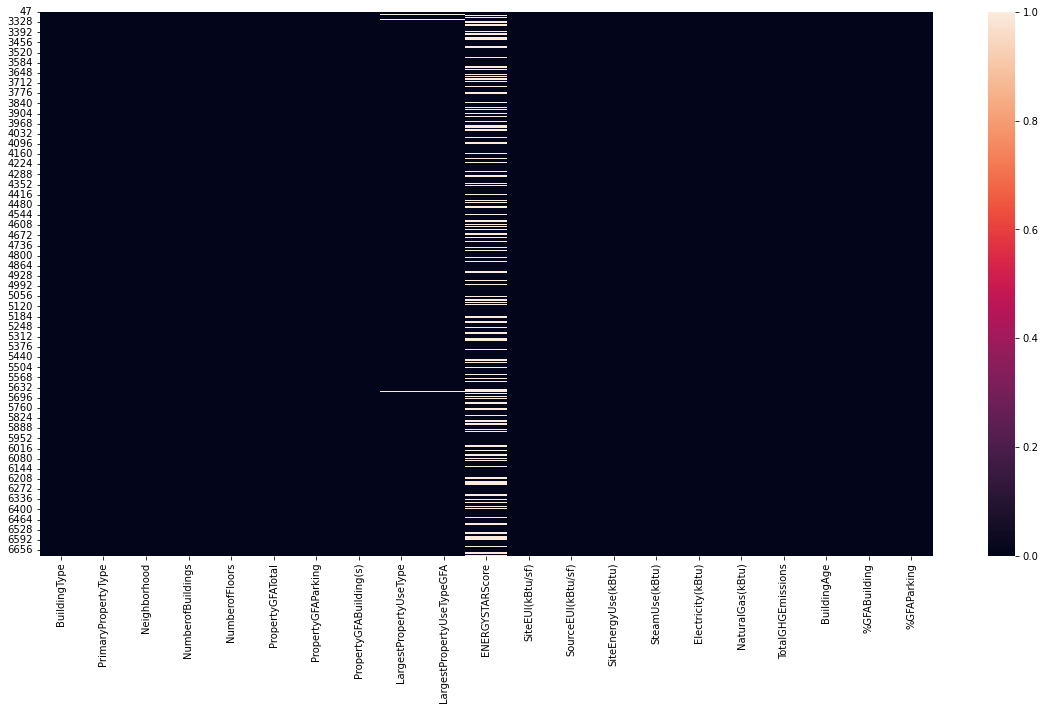

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.isna())

In [44]:
data.reset_index(inplace = True, drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               3427 non-null   object 
 1   PrimaryPropertyType        3427 non-null   object 
 2   Neighborhood               3427 non-null   object 
 3   NumberofBuildings          3427 non-null   float64
 4   NumberofFloors             3427 non-null   float64
 5   PropertyGFATotal           3427 non-null   int64  
 6   PropertyGFAParking         3427 non-null   int64  
 7   PropertyGFABuilding(s)     3427 non-null   int64  
 8   LargestPropertyUseType     3395 non-null   object 
 9   LargestPropertyUseTypeGFA  3395 non-null   float64
 10  ENERGYSTARScore            2578 non-null   float64
 11  SiteEUI(kBtu/sf)           3425 non-null   float64
 12  SourceEUI(kBtu/sf)         3427 non-null   float64
 13  SiteEnergyUse(kBtu)        3427 non-null   float

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

def KNNImput(df, x):
    categorical_columns = df.select_dtypes(['category','object']).columns
    numerical_columns = df.select_dtypes(['int64','float64']).columns
    ohe = OneHotEncoder(sparse=False)
    ohe.fit_transform(df[categorical_columns])
    test_df = pd.DataFrame(columns = ohe.get_feature_names(),
                       data = ohe.fit_transform(df[categorical_columns]))
    test_df.reset_index(drop=True)
    data = pd.merge(df[numerical_columns],test_df,left_index=True,right_index=True)

    data_fillna = KNNImputer(n_neighbors = x).fit_transform(data)
    
    data_fillna_num = data_fillna[:, 0:len(numerical_columns)]
    data_nonan_num = pd.DataFrame(columns = numerical_columns, data = data_fillna_num)
    
    data_fillna_cat = data_fillna[:, len(numerical_columns):]
    data_nonan_cat = ohe.inverse_transform(data_fillna_cat)
    data_nonan_cat = pd.DataFrame(columns= categorical_columns, data = data_nonan_cat)
    
    result = pd.concat([data_nonan_cat, data_nonan_num], axis = 1)
    result = result.reset_index(drop = True)
    
    return result

In [46]:
%%time
data = KNNImput(data, 1)

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 3426
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               3395 non-null   object 
 1   PrimaryPropertyType        3395 non-null   object 
 2   Neighborhood               3395 non-null   object 
 3   LargestPropertyUseType     3395 non-null   object 
 4   NumberofBuildings          3395 non-null   float64
 5   NumberofFloors             3395 non-null   float64
 6   PropertyGFATotal           3395 non-null   float64
 7   PropertyGFAParking         3395 non-null   float64
 8   PropertyGFABuilding(s)     3395 non-null   float64
 9   LargestPropertyUseTypeGFA  3395 non-null   float64
 10  ENERGYSTARScore            3395 non-null   float64
 11  SiteEUI(kBtu/sf)           3395 non-null   float64
 12  SourceEUI(kBtu/sf)         3395 non-null   float64
 13  SiteEnergyUse(kBtu)        3395 non-null   float

# 3. Analyses exploratoires

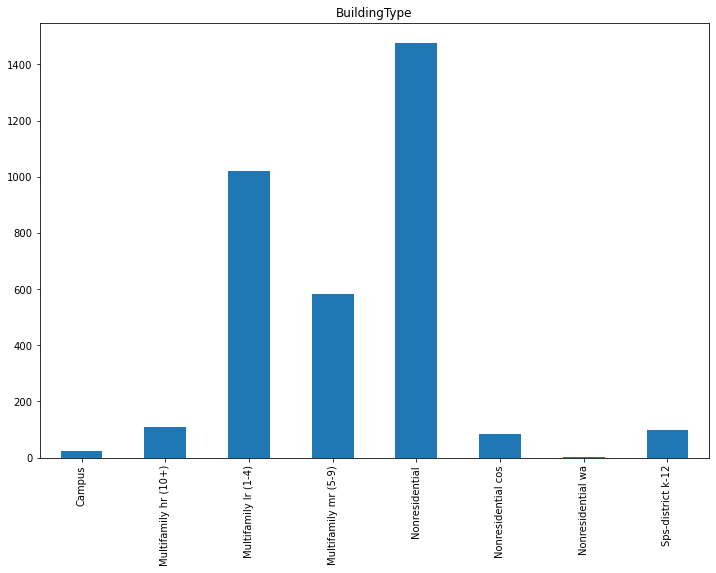

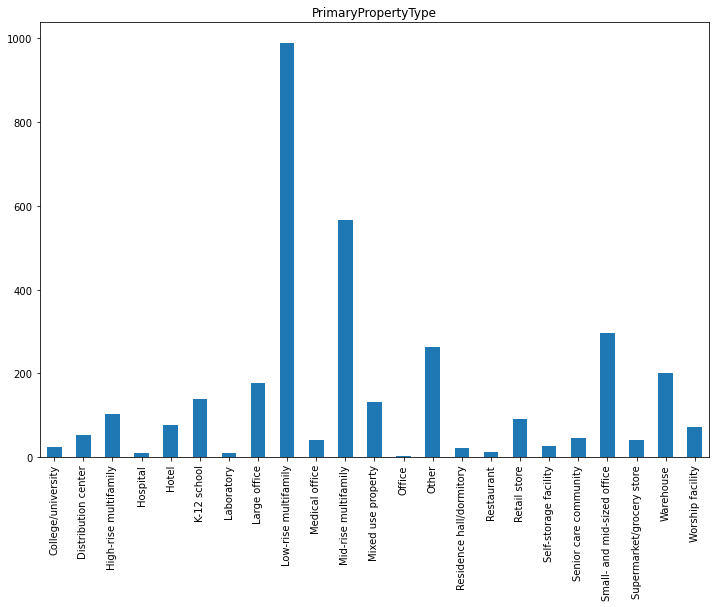

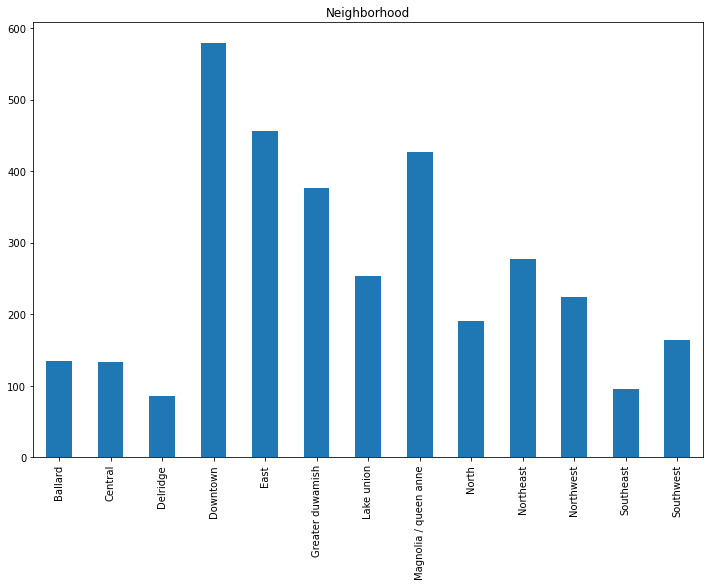

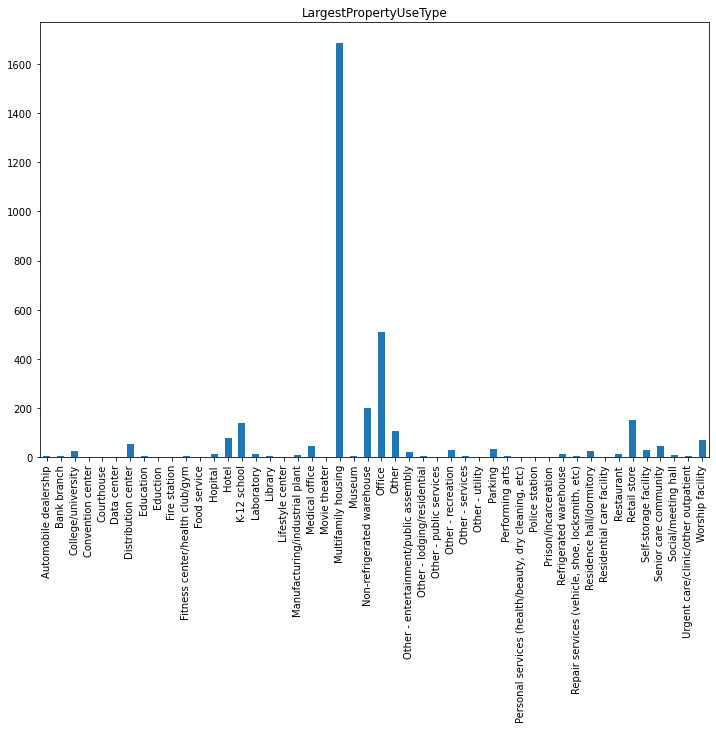

In [47]:
# Distribution des variables catégorielles

qualitative_columns = data.select_dtypes(['object', 'category'])

for col in qualitative_columns:
    fig = plt.figure(figsize=(12,8))
    data[col].value_counts().sort_index(axis=0).plot(kind='bar')
    plt.title(col)
    plt.show()


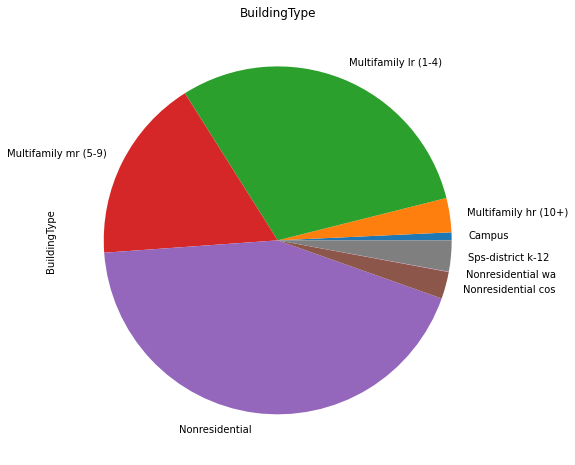

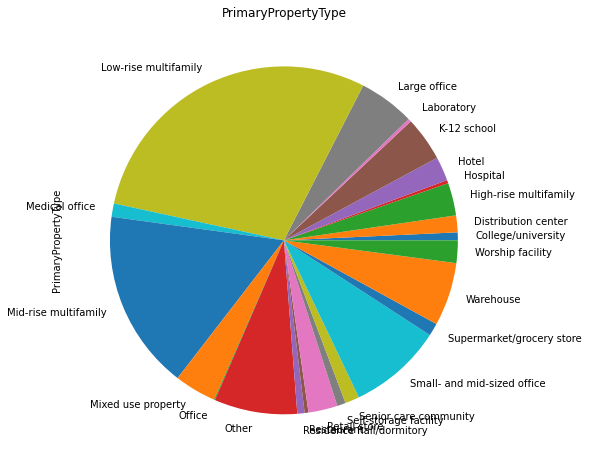

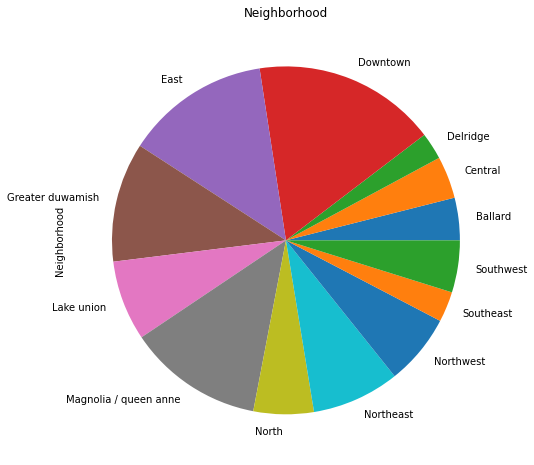

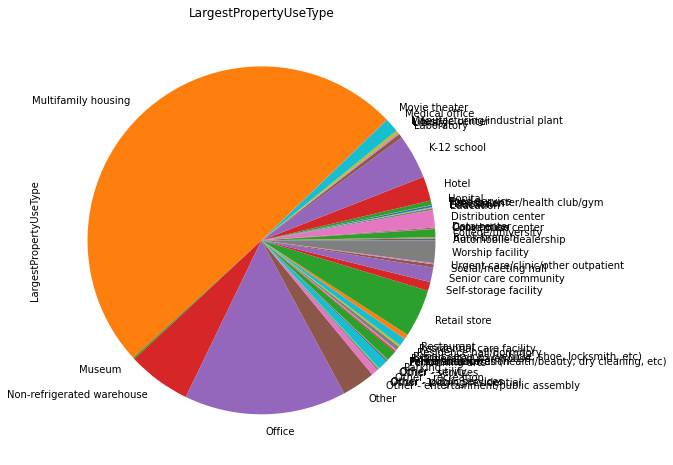

In [48]:
# Pourcentage des variables catégorielles

for col in qualitative_columns:
    fig = plt.figure(figsize=(12,8))
    data[col].value_counts().sort_index(axis=0).plot(kind='pie')
    plt.title(col)
    plt.show()

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


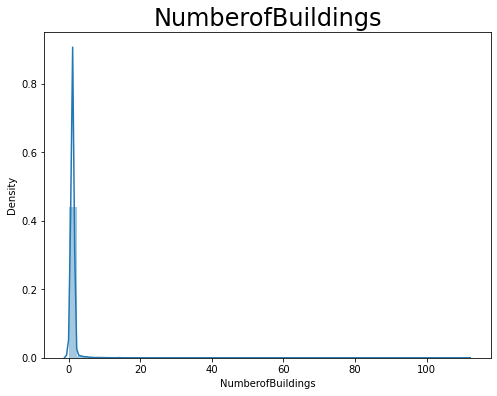

0    1.0
dtype: float64
(0.4715758468335788, 0.000999000999000999, (1, 1))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


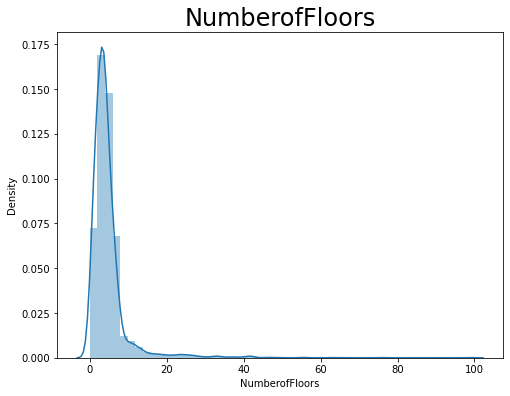

0    4.0
dtype: float64
(0.10265095729013254, 0.000999000999000999, (3, 4))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


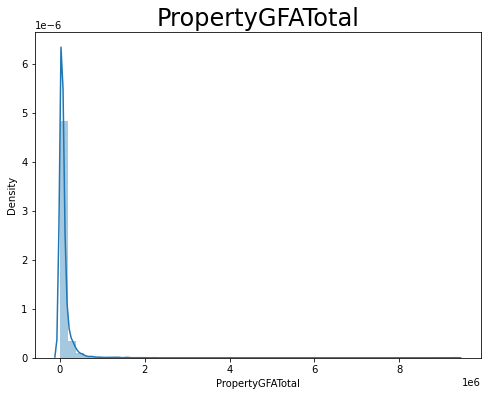

0    36000.0
dtype: float64
(0.0034961900493052367, 1.0, (14, 271))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


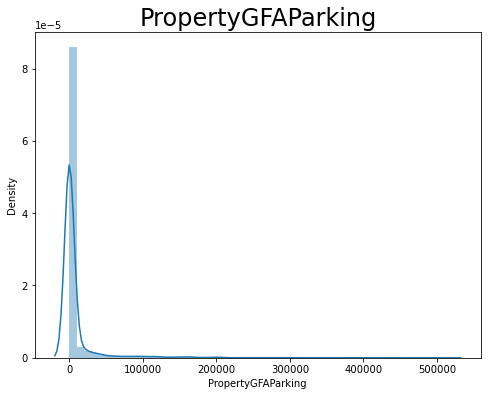

0    0.0
dtype: float64
(0.4238586156111929, 0.000999000999000999, (0, 237))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


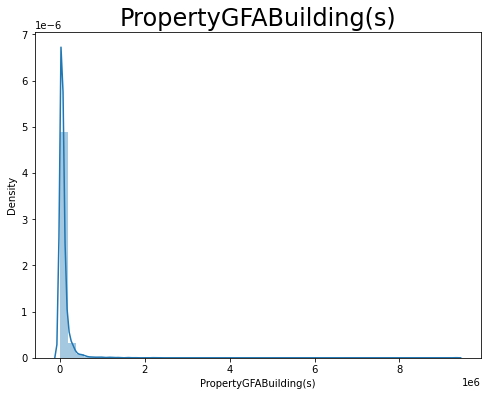

0    36000.0
dtype: float64
(0.003933747412008276, 0.999000999000999, (33, 305))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


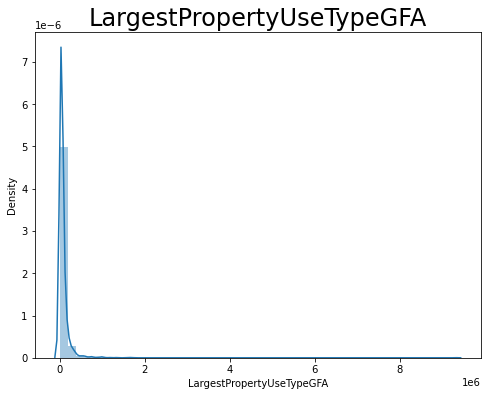

0    21600.0
1    22000.0
2    24000.0
dtype: float64
(0.003789791373696408, 0.999000999000999, (226, 493))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


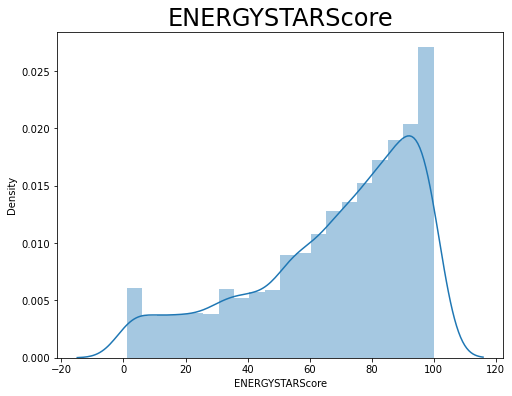

0    100.0
dtype: float64
(0.022533136966126632, 0.993006993006993, (95, 99))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


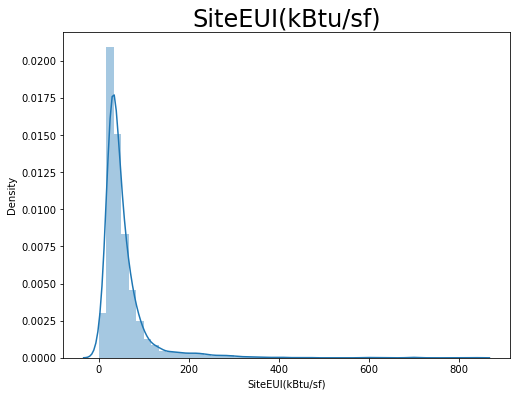

0     0.000000
1    24.700001
2    28.799999
dtype: float64
(0.0032400561119281246, 1.0, (227, 230))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


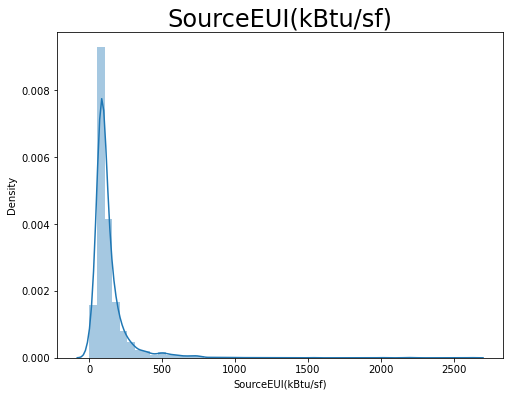

0    0.0
dtype: float64
(0.0035346097201767305, 1.0, (359, 503))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


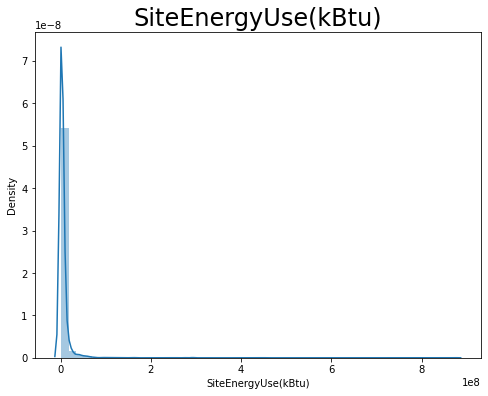

0    0.0
dtype: float64
(0.0029960045440580174, 1.0, (240, 472))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


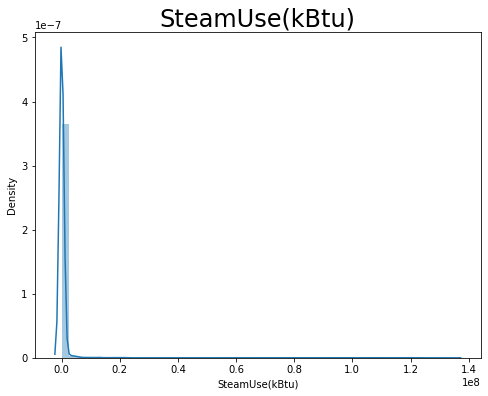

0    0.0
dtype: float64
(0.48041237113402063, 0.000999000999000999, (0, 45))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


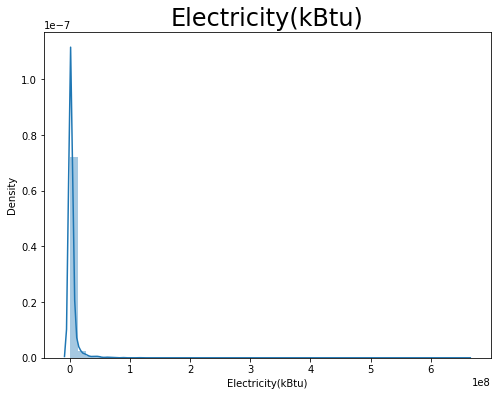

0    0.0
dtype: float64
(0.002832716210165648, 1.0, (709, 959))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


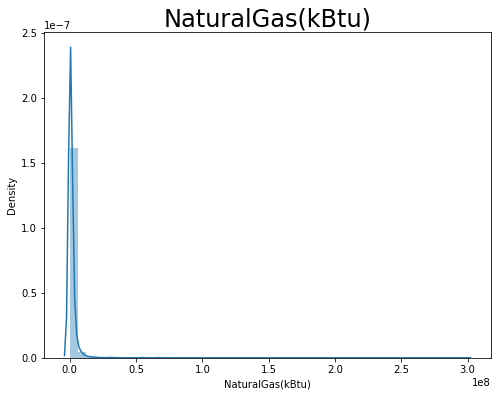

0    0.0
dtype: float64
(0.1865979381443299, 0.000999000999000999, (0, 27))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


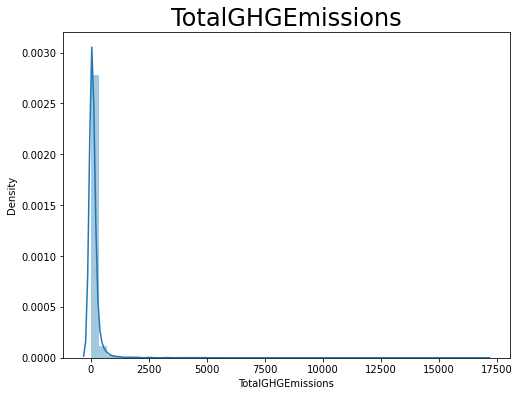

0    0.0
dtype: float64
(0.0034225503268399127, 1.0, (132, 208))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


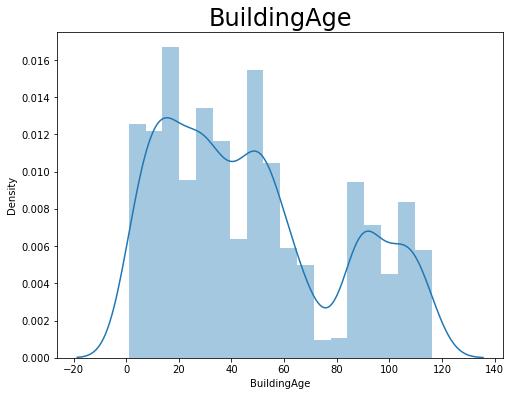

0    16.0
dtype: float64
(0.034204712812960225, 0.4675324675324675, (0, 55))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


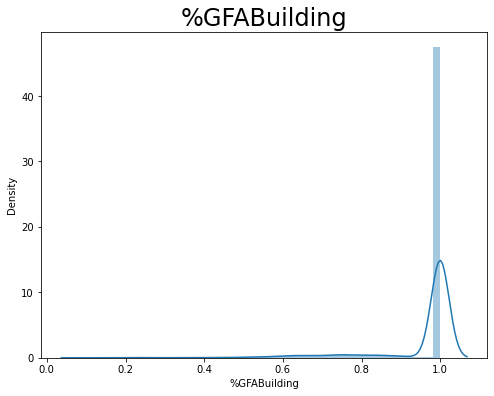

0    1.0
dtype: float64
(0.4238586156111929, 0.000999000999000999, (513, 513))


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


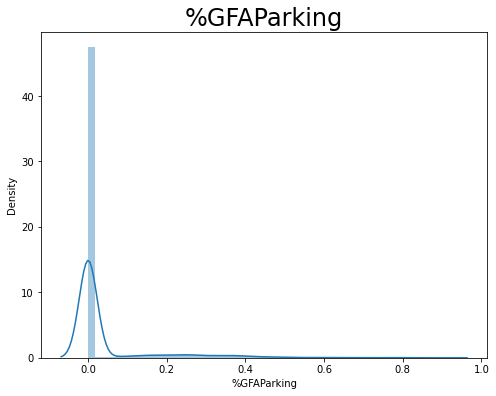

0    0.0
dtype: float64
(0.4238586156111929, 0.000999000999000999, (0, 513))


In [49]:
# Distribution des variables quantitatives

quantitative_columns = data.select_dtypes(['int64', 'float64'])
for col in quantitative_columns:
    n_bins = 20
    fig = plt.figure(figsize=(8,6))
    sns.distplot(data[col])
    plt.title(col, fontsize = 24)
    plt.show()

    print(data[col].mode())

    print(dip.diptst(data[col])) # DIP test pour vérifier la caractère de varible (uni ou multimodale)
                                    # si 2ème valeur < 0.05, il est multimodale

In [50]:
# test normality

pg.normality(data,method="normaltest")

,W,pval,normal
NumberofBuildings,10235.165733,0.000000e+00,False
NumberofFloors,3921.079236,0.000000e+00,False
PropertyGFATotal,8149.106161,0.000000e+00,False
PropertyGFAParking,4149.584287,0.000000e+00,False
PropertyGFABuilding(s),8622.873125,0.000000e+00,False
LargestPropertyUseTypeGFA,8906.846961,0.000000e+00,False
ENERGYSTARScore,322.217078,1.075104e-70,False
SiteEUI(kBtu/sf),3477.911735,0.000000e+00,False
SourceEUI(kBtu/sf),4205.519123,0.000000e+00,False
SiteEnergyUse(kBtu),8180.310182,0.000000e+00,False


/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


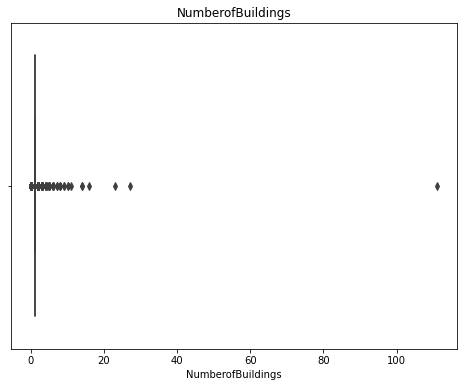

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


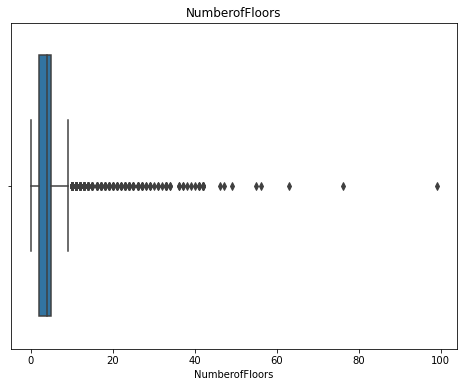

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


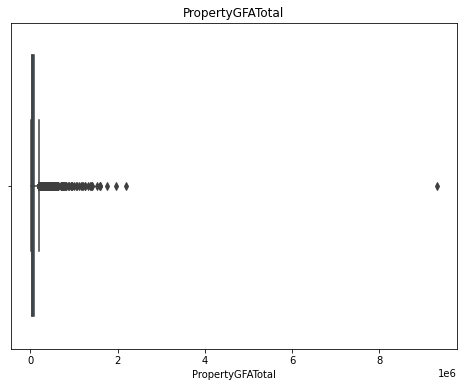

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


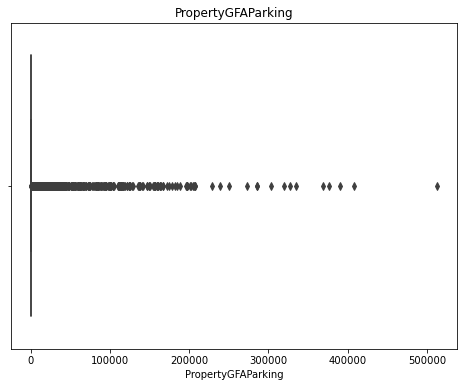

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


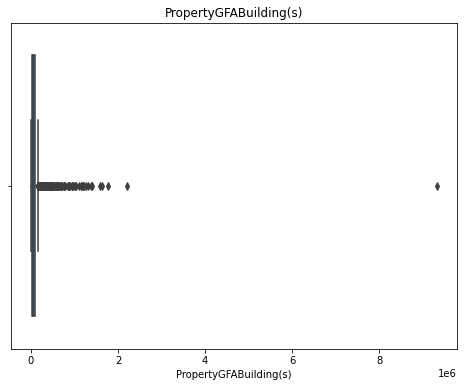

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


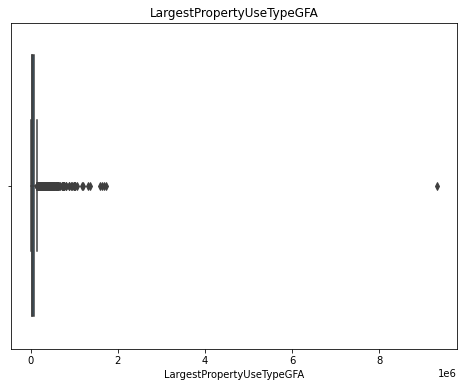

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


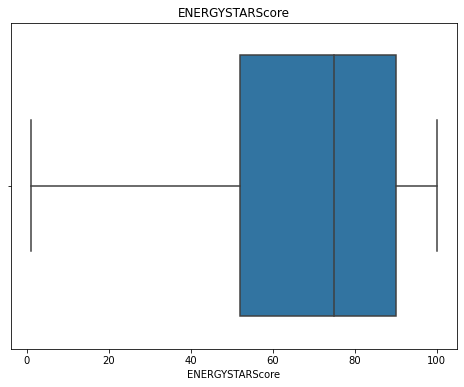

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


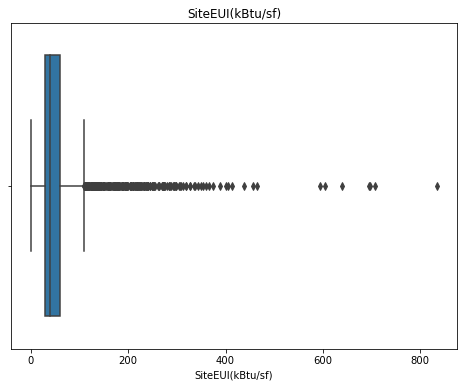

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


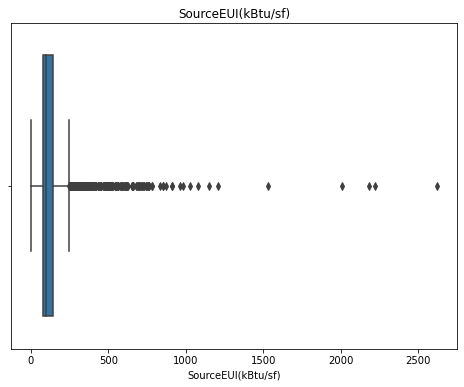

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


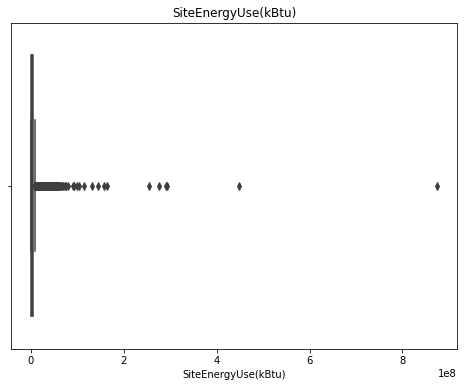

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


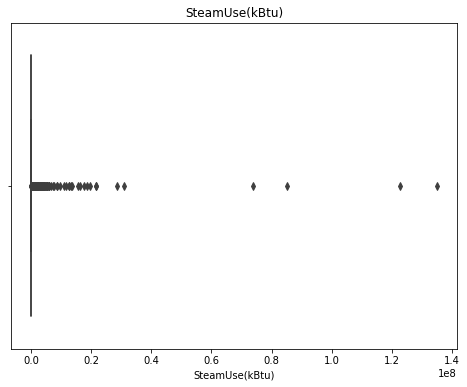

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


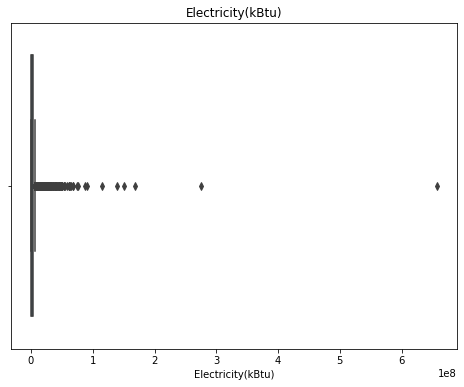

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


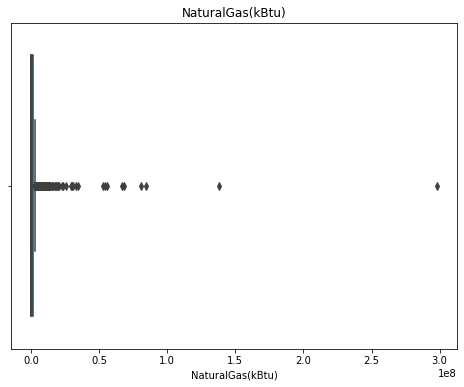

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


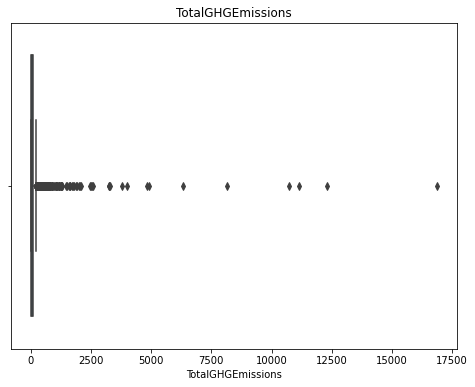

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


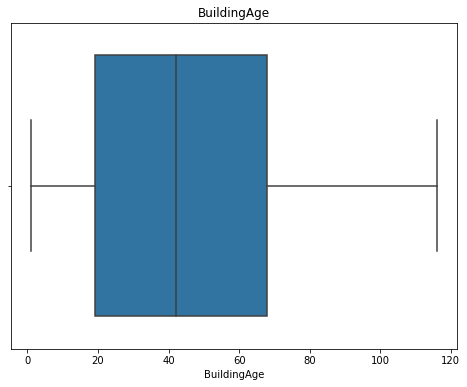

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


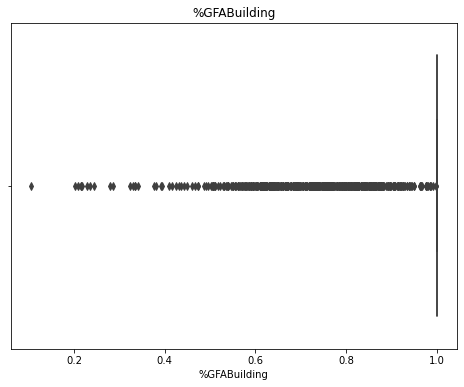

/Users/vonhattam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


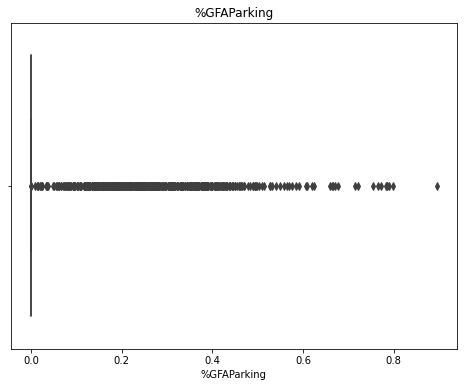

In [51]:
# Analyses graphiques des variables quantitatives

quantitative_columns = data.select_dtypes(['int64','float64'])
for col in quantitative_columns:
    n_bins = 20
    fig = plt.figure(figsize=(8,6))
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

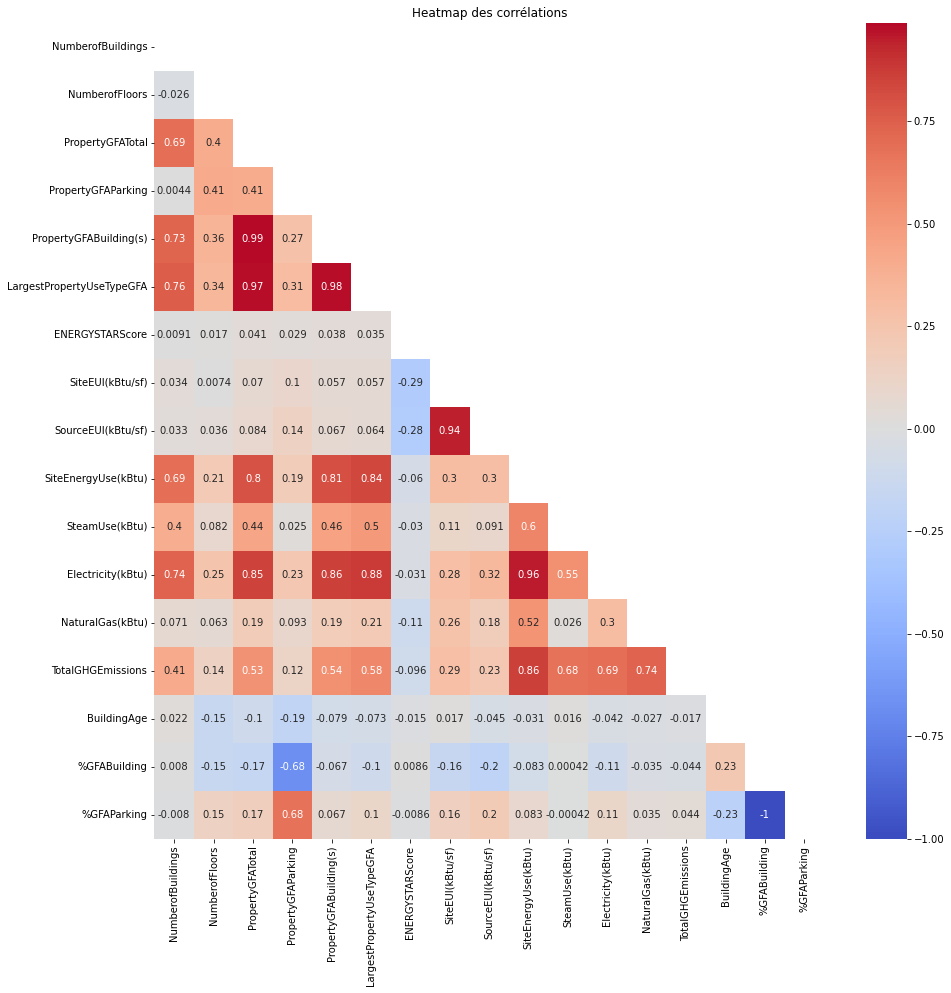

In [52]:
# Corrélation entre les variables quantitatives

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, mask=mask, center=0, cmap="coolwarm")
plt.title('Heatmap des corrélations')
plt.show()

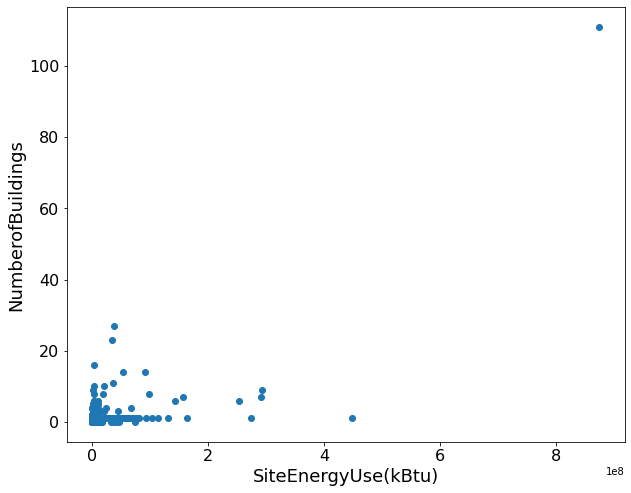

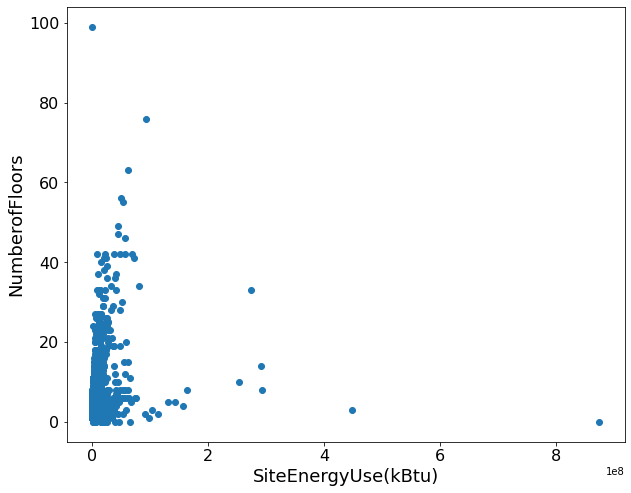

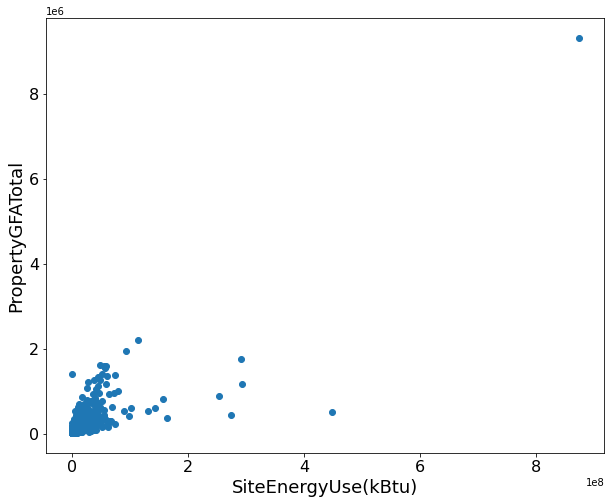

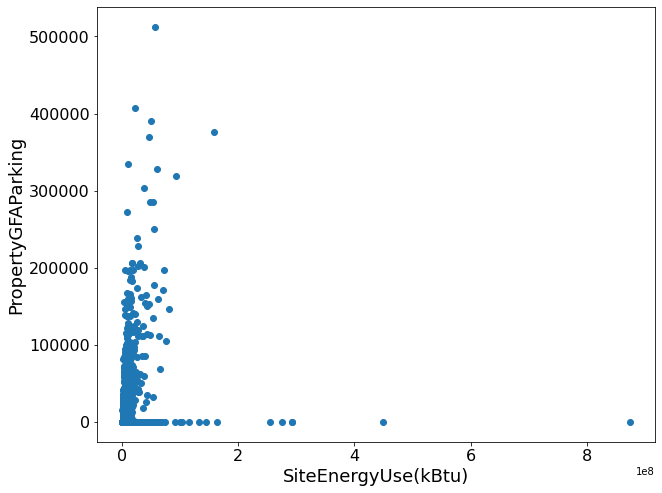

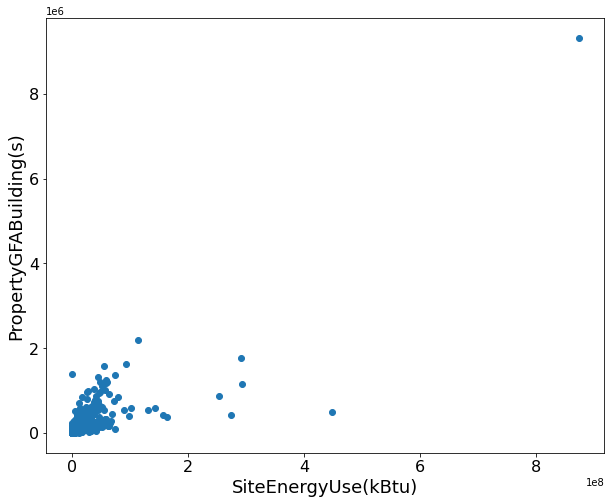

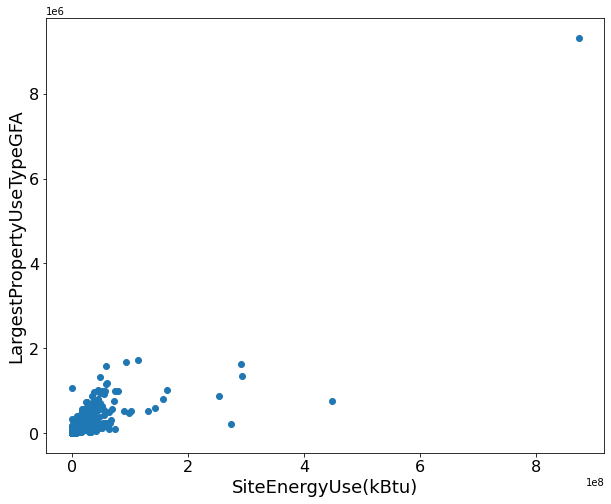

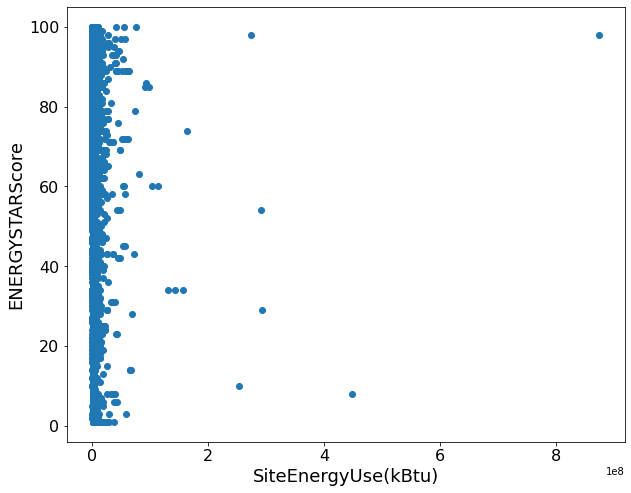

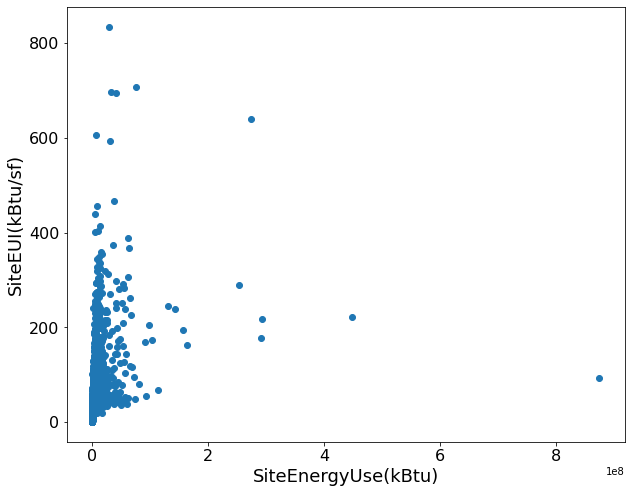

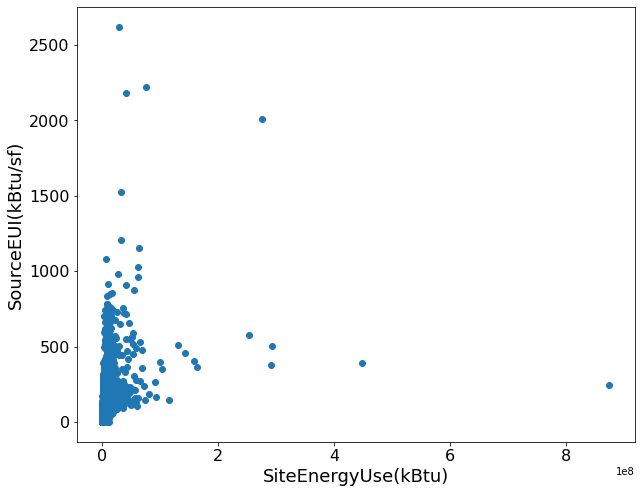

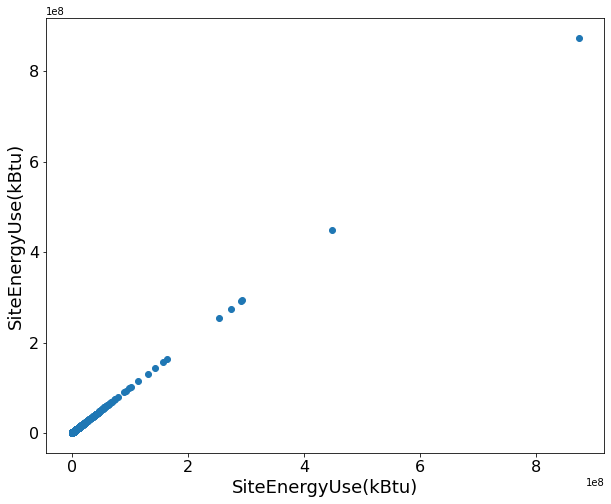

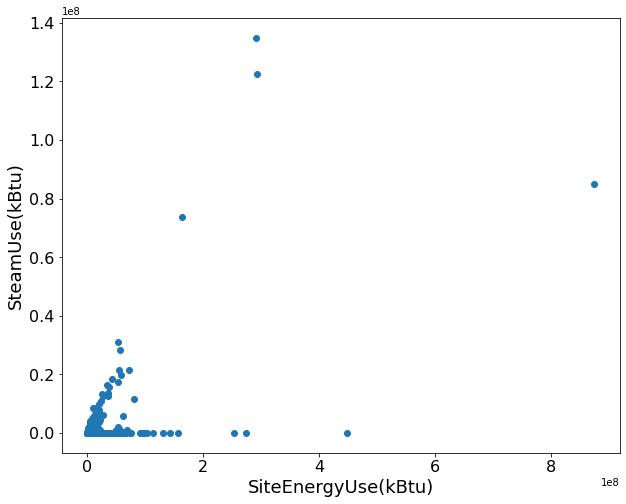

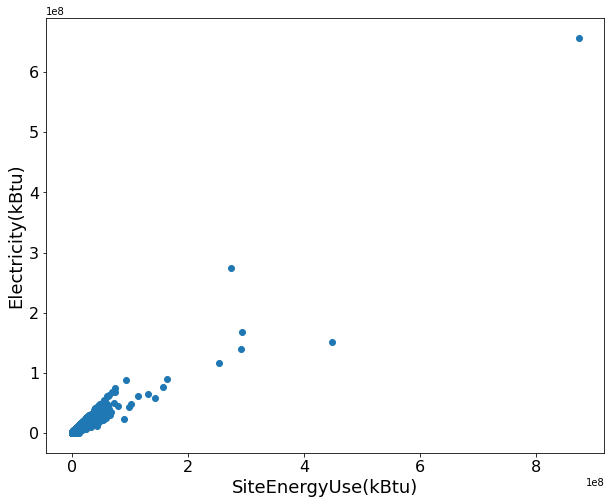

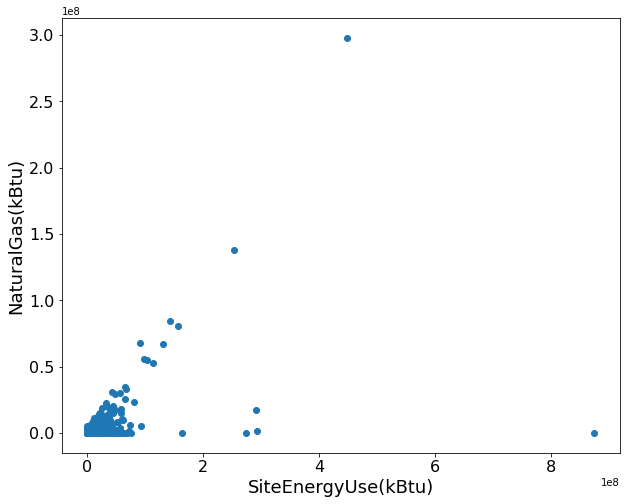

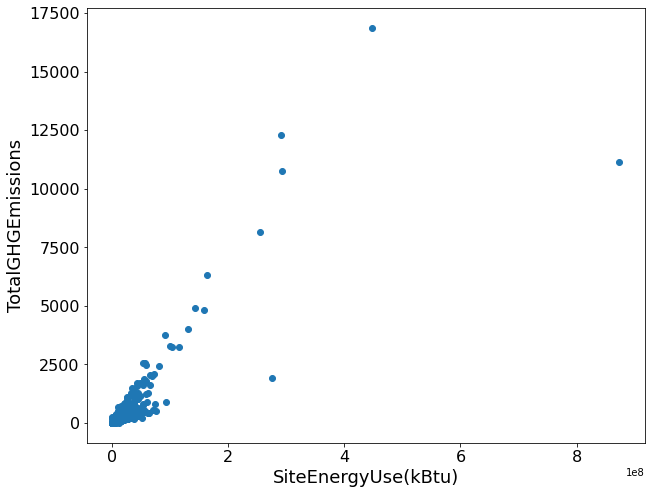

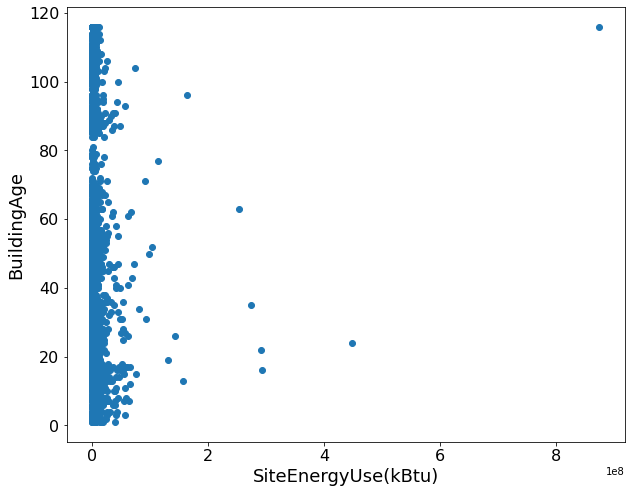

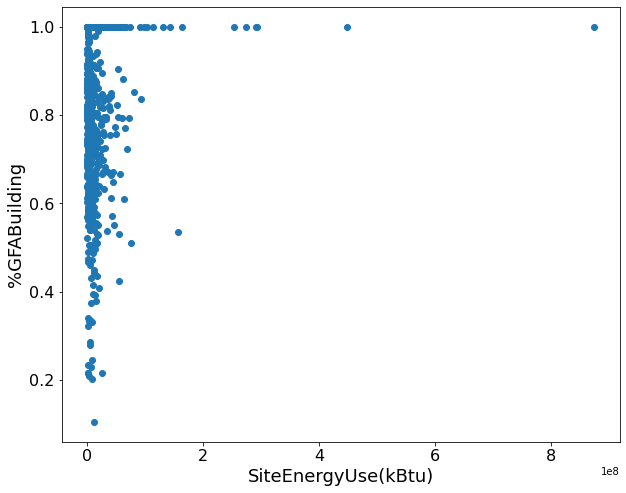

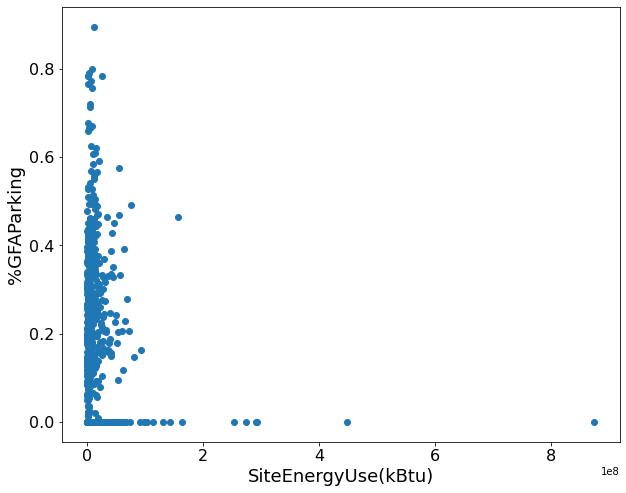

In [53]:
# Relation entre variable quantitative et variable cible (consommation électrique)


for col in data.select_dtypes(['int64','float64']):
    plt.figure(figsize=(10, 8))
    plt.scatter(x='SiteEnergyUse(kBtu)', y = col, data= data)
    plt.xlabel('SiteEnergyUse(kBtu)', fontsize = 18)
    plt.xticks(fontsize = 16)
    plt.ylabel(col, fontsize = 18)
    plt.yticks(fontsize = 16)
    plt.show()

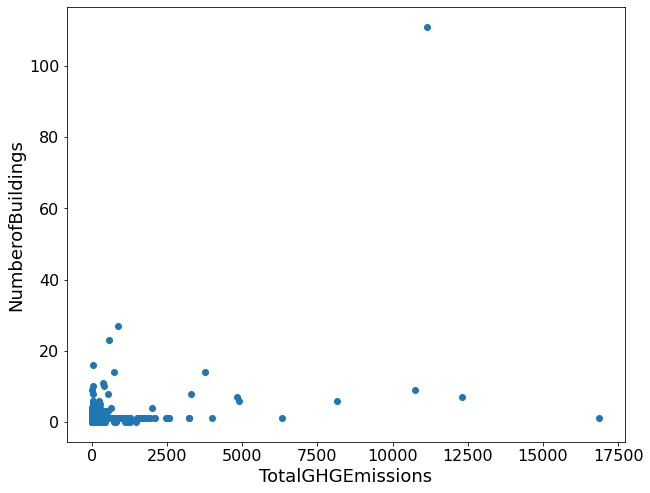

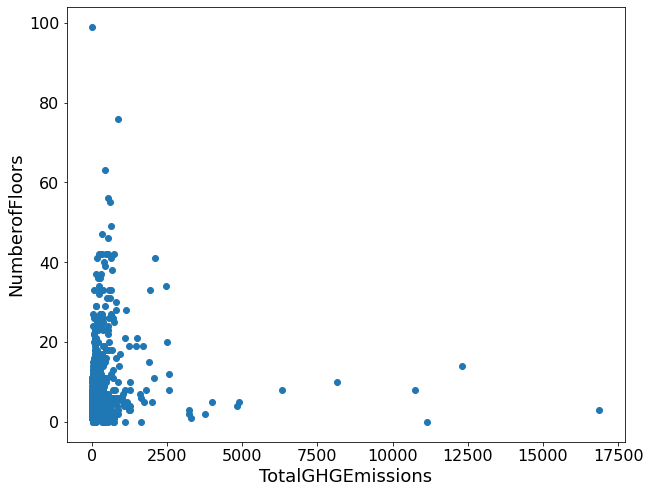

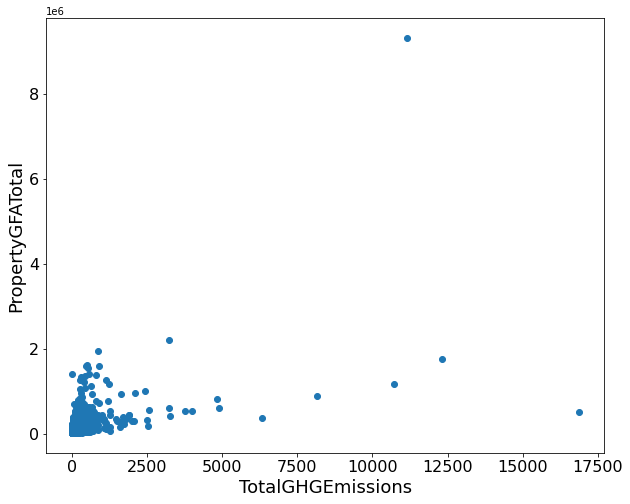

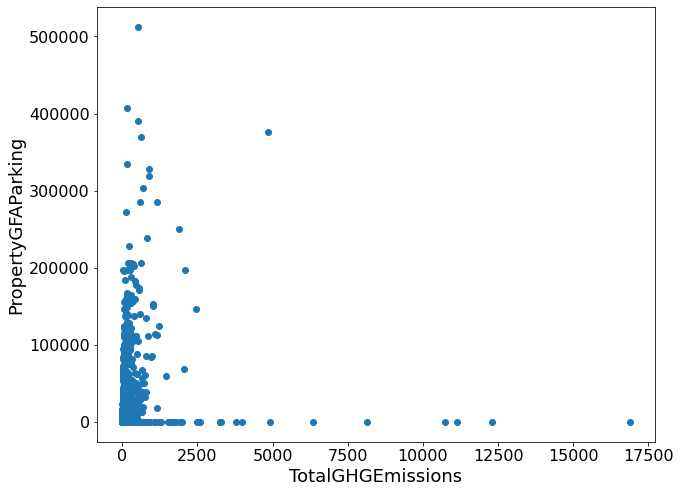

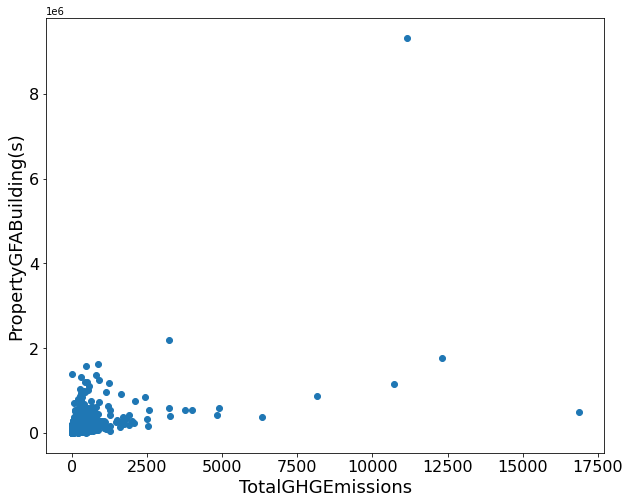

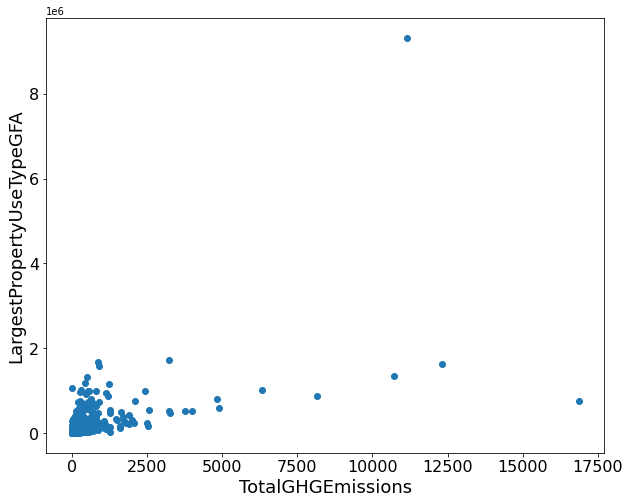

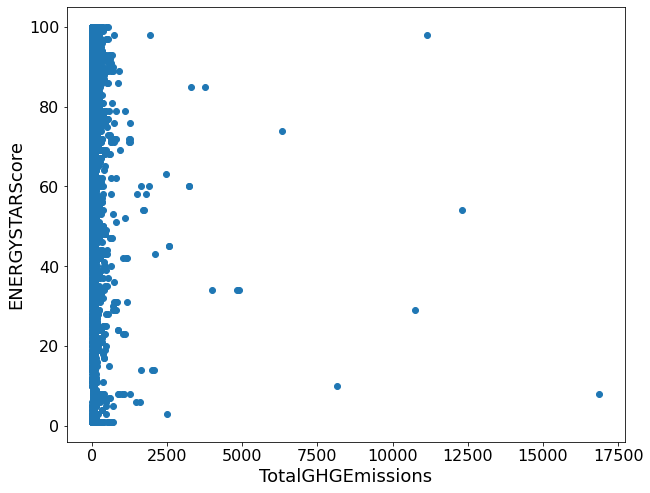

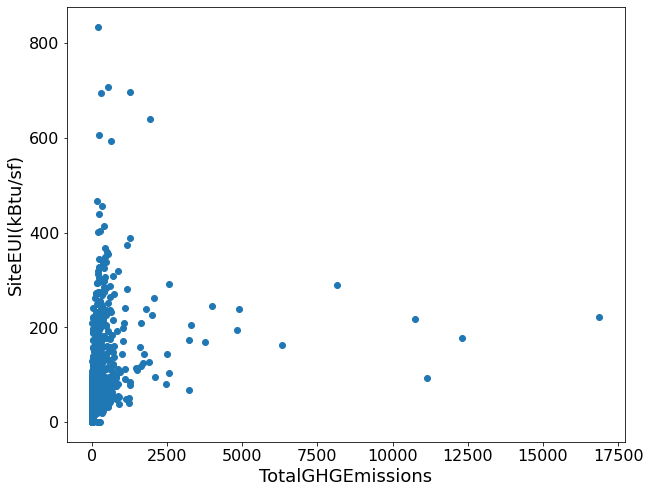

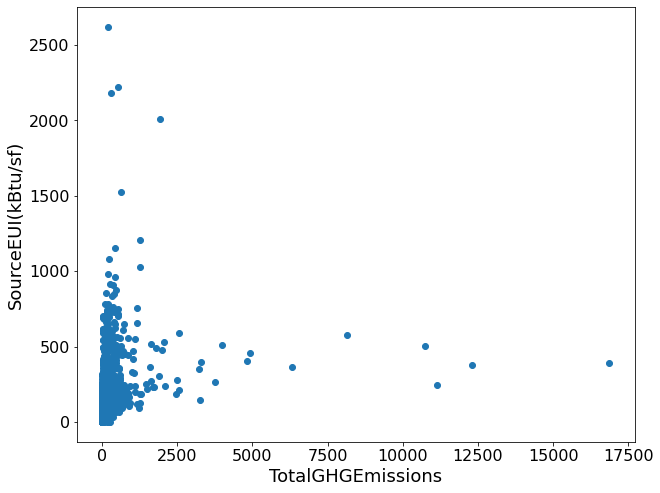

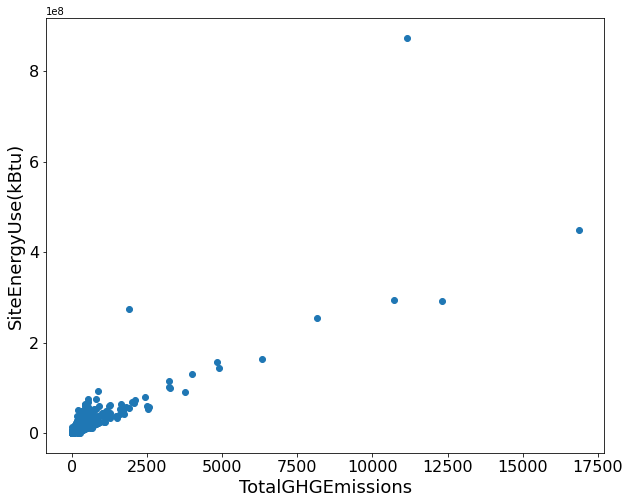

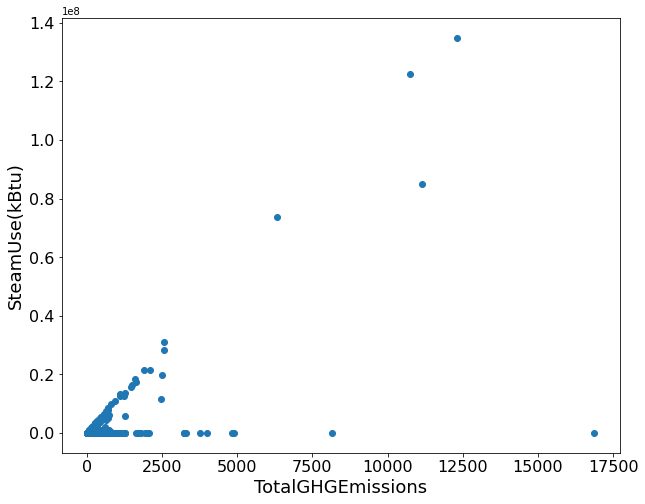

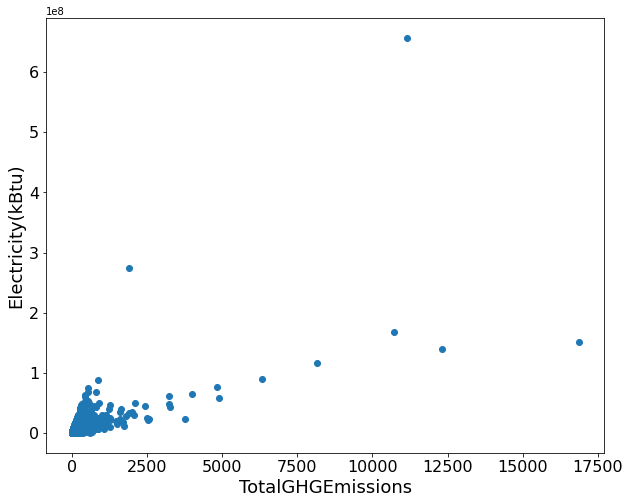

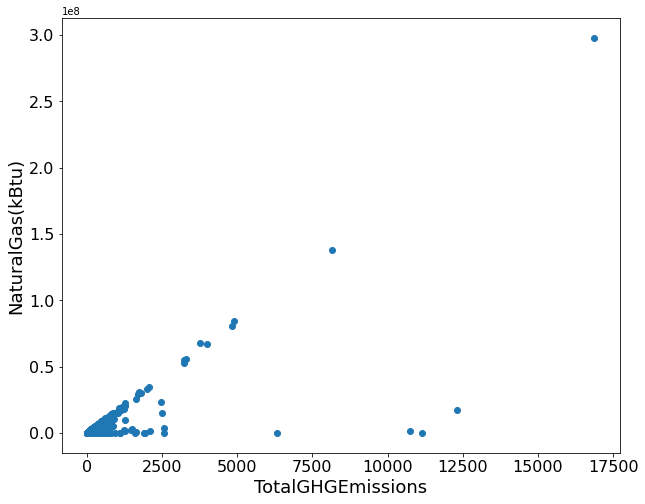

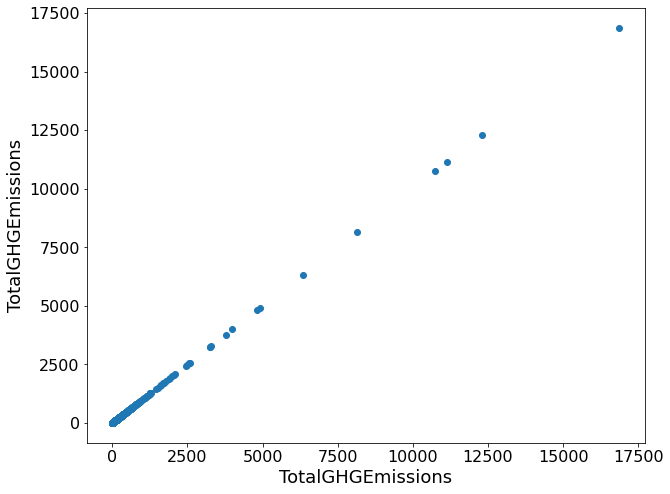

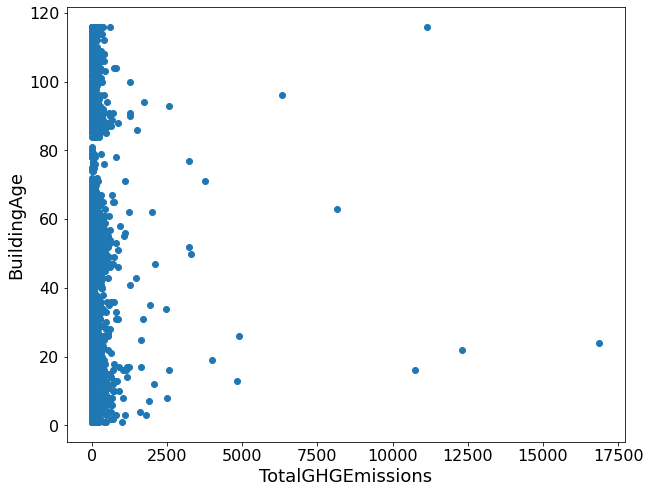

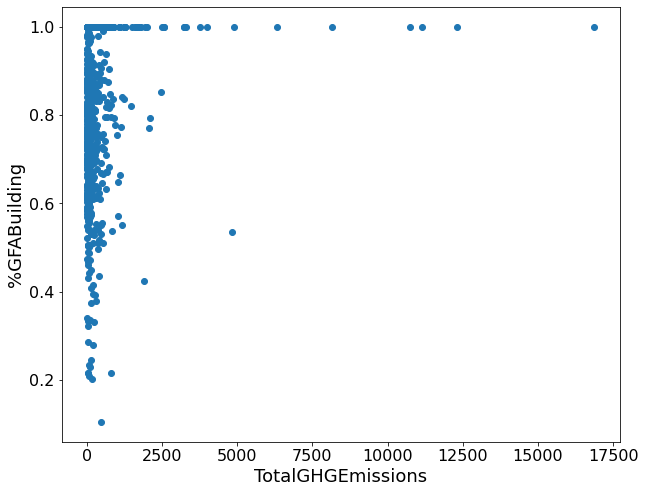

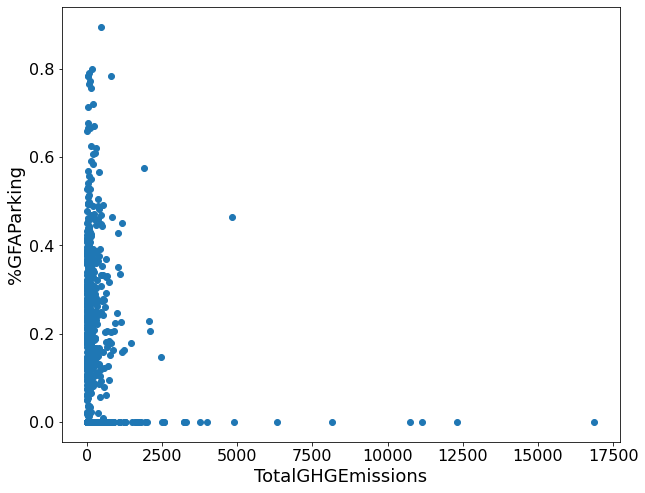

In [54]:
# Relation entre variable quantitative et variable cible (émission CO2)

for col in data.select_dtypes(['int64','float64']):
    plt.figure(figsize=(10, 8))
    plt.scatter(x='TotalGHGEmissions', y = col, data= data)
    plt.xlabel('TotalGHGEmissions', fontsize = 18)
    plt.xticks(fontsize = 16)
    plt.ylabel(col, fontsize = 18)
    plt.yticks(fontsize = 16)
    plt.show()

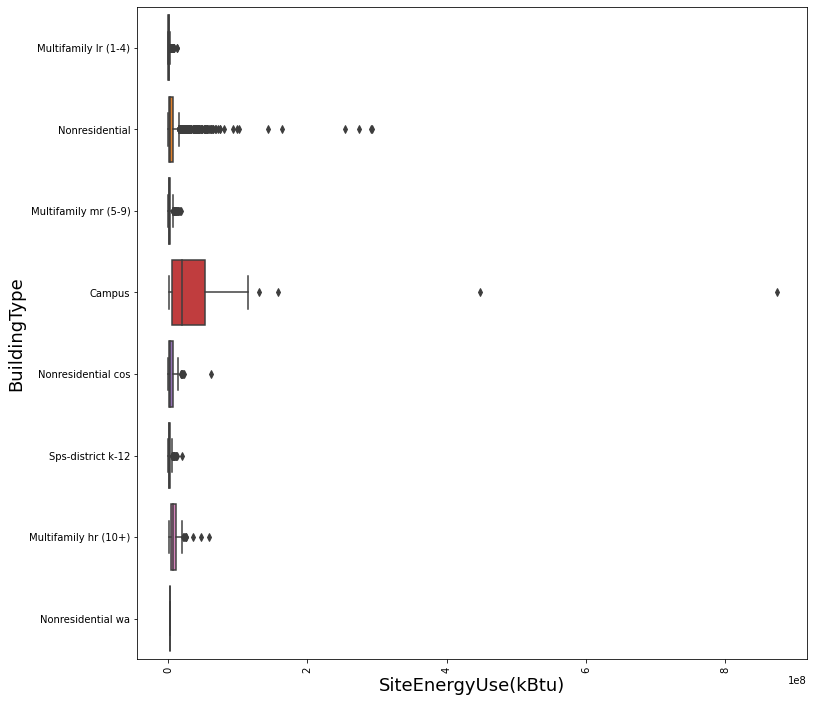

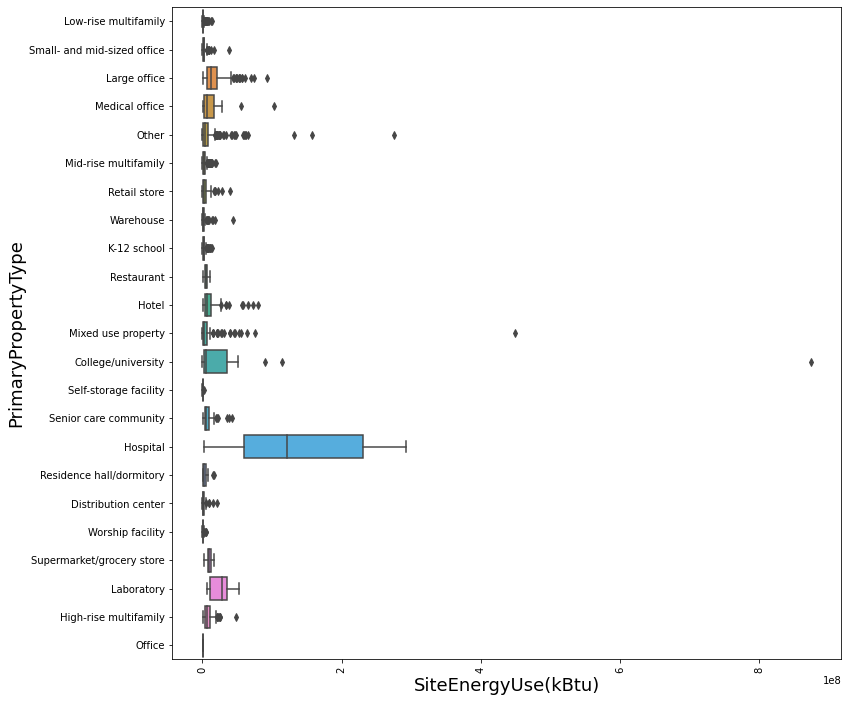

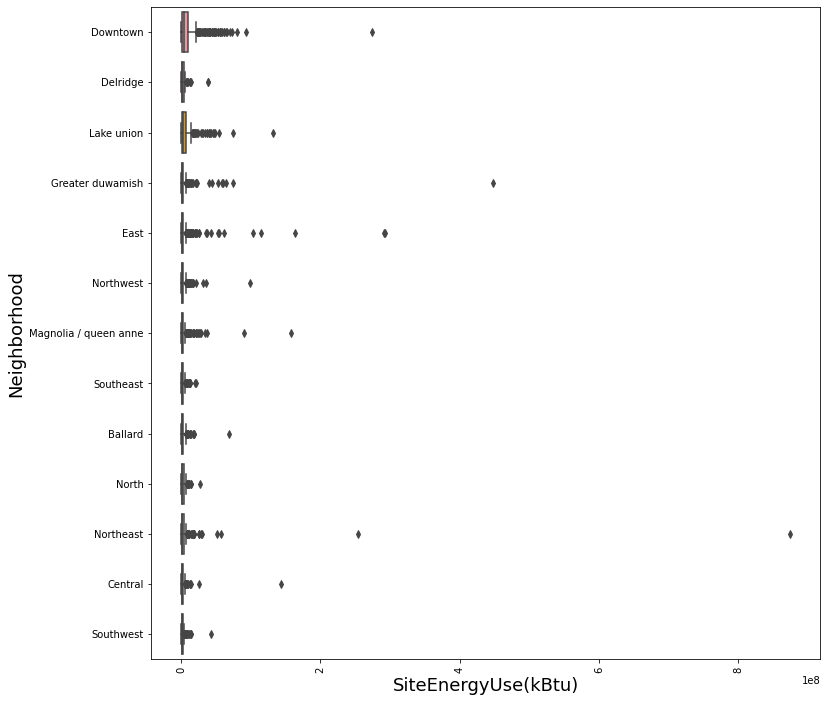

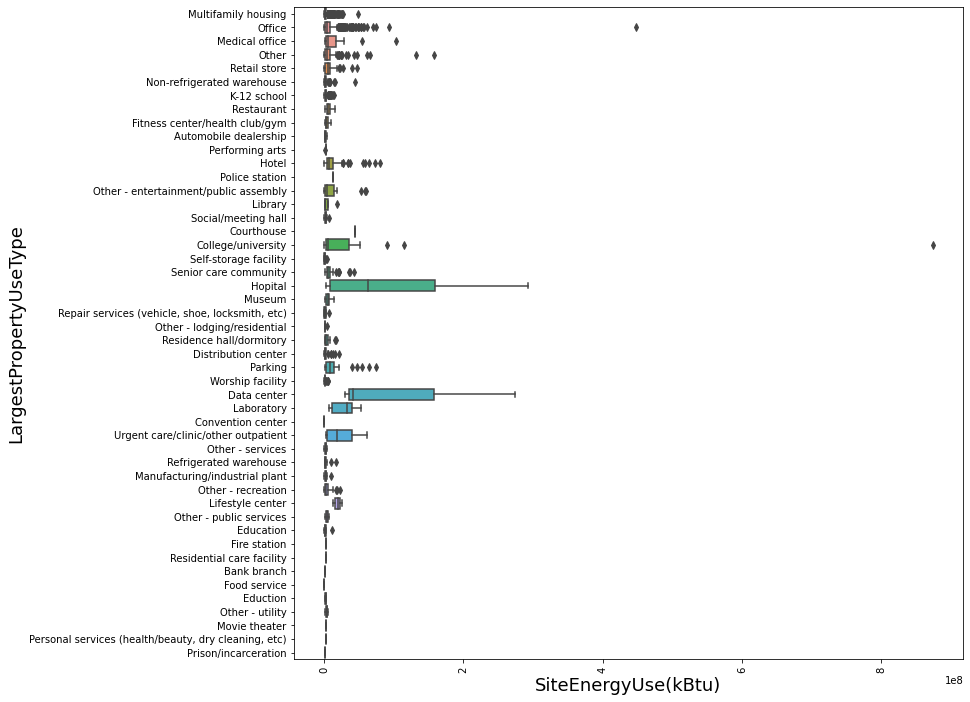

In [55]:
# Relation entre variable qualitative et variable cible (consommation électrique)

for col in data.select_dtypes(['category','object']):
    plt.figure(figsize=(12, 12))
    sns.boxplot(x='SiteEnergyUse(kBtu)', y = col, data= data)
    plt.xticks(rotation= 90)
    plt.ylabel(col, fontsize = 18)
    plt.xlabel('SiteEnergyUse(kBtu)', fontsize = 18)
    plt.show()

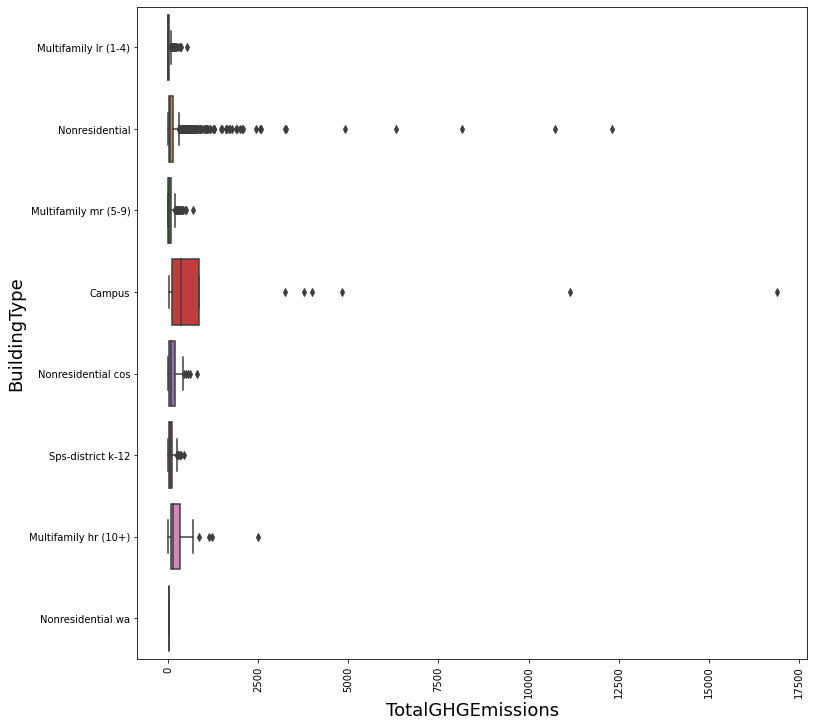

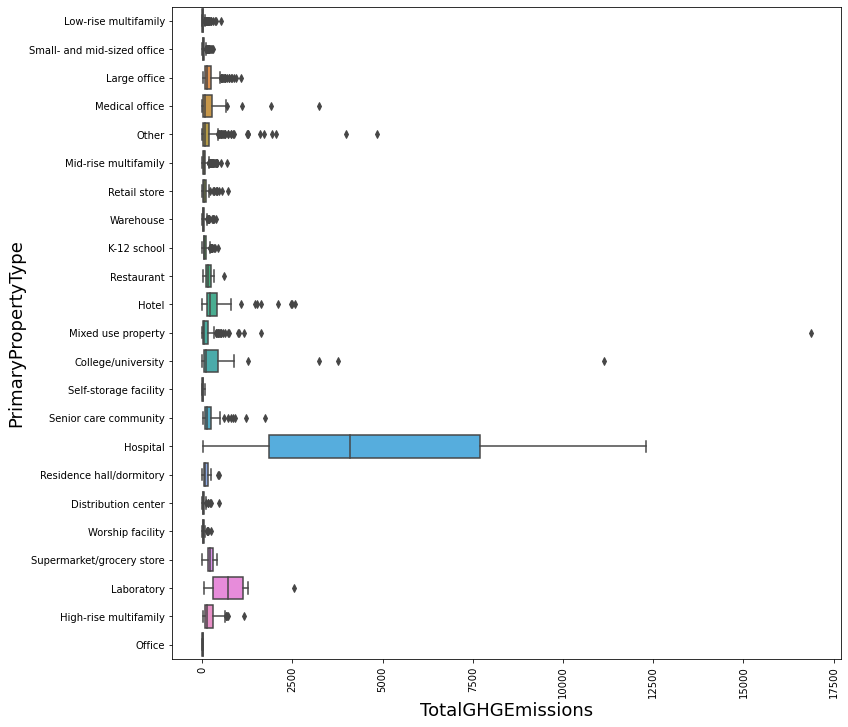

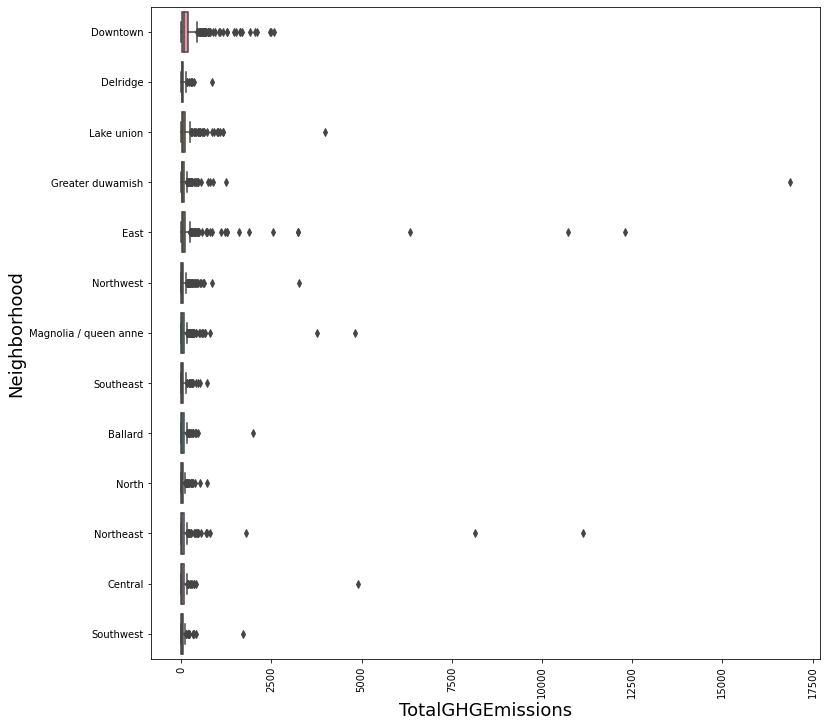

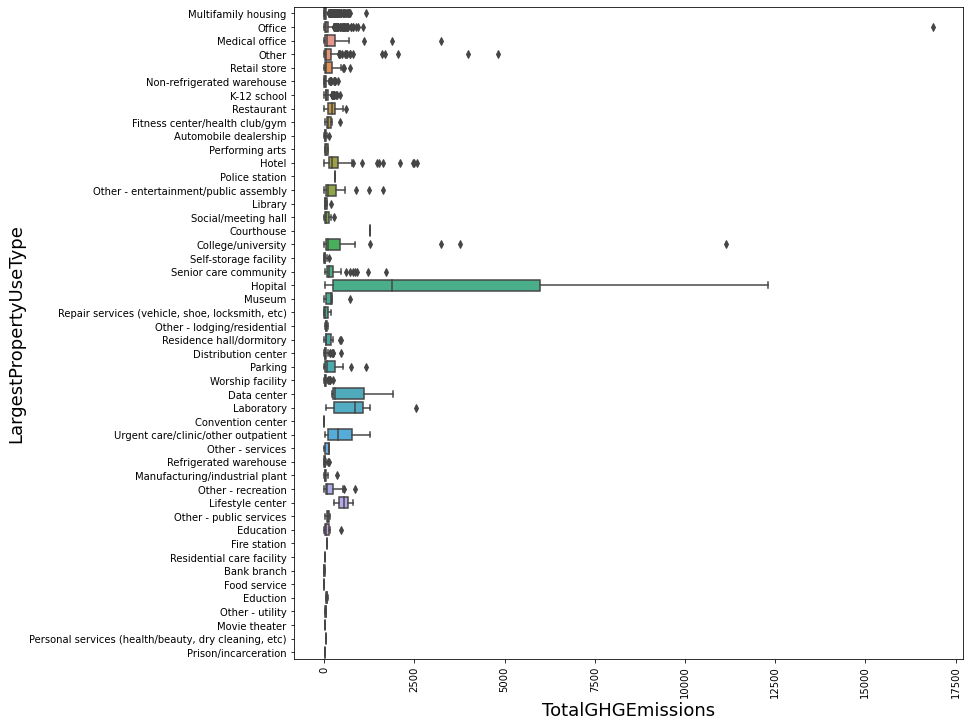

In [56]:
# Relation entre variable qualitative et variable cible (émission CO2)

for col in data.select_dtypes(['category','object']):
    plt.figure(figsize=(12, 12))
    sns.boxplot(x='TotalGHGEmissions', y = col, data= data)
    plt.xticks(rotation= 90)
    plt.ylabel(col, fontsize = 18)
    plt.xlabel('TotalGHGEmissions', fontsize = 18)
    plt.show()

In [57]:
data.to_csv("data_elec_2.csv", index=False)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 3426
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               3395 non-null   object 
 1   PrimaryPropertyType        3395 non-null   object 
 2   Neighborhood               3395 non-null   object 
 3   LargestPropertyUseType     3395 non-null   object 
 4   NumberofBuildings          3395 non-null   float64
 5   NumberofFloors             3395 non-null   float64
 6   PropertyGFATotal           3395 non-null   float64
 7   PropertyGFAParking         3395 non-null   float64
 8   PropertyGFABuilding(s)     3395 non-null   float64
 9   LargestPropertyUseTypeGFA  3395 non-null   float64
 10  ENERGYSTARScore            3395 non-null   float64
 11  SiteEUI(kBtu/sf)           3395 non-null   float64
 12  SourceEUI(kBtu/sf)         3395 non-null   float64
 13  SiteEnergyUse(kBtu)        3395 non-null   float